<font size=7 color ="#5499C7" >AI CA4 - Machine Learning</font>
- <font size=5>__Name__ : Kourosh Sajjadi</font>
- <font size=5>__UID__  : 810100587</font>

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 0: Basic Concepts and Problem Goals</b></font><br></p>

<p align="justify">
In this project, we explore the use of Machine Learning (ML) techniques to predict house pricing in Boston, Massachusetts. We employ three primary methods: linear regression, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN) clustering, along with two advanced techniques: ensemble methods and XGBoost. The project follows a comprehensive approach starting with <font color="#A9CCE3"><b>data gathering</b></font>, where we collect housing data relevant to the Boston area, including features like size, location, and condition of the properties.
</p>

<p align="justify">
Following data collection, the next step involves <font color="#A9CCE3"><b>data preprocessing</b></font>, which is crucial for removing inconsistencies and preparing the data for effective modeling. This phase includes handling missing values, normalizing data, and feature selection to improve the model's performance.
</p>

<p align="justify">
After preprocessing, we <font color="#A9CCE3"><b>train our models</b></font> on the cleaned dataset. Training involves feeding the data into our chosen ML algorithms to help them learn from the data's features and their corresponding impact on house prices. Once the models are trained, we proceed to <font color="#A9CCE3"><b>model evaluation</b></font>, where we assess their performance using metrics like Mean Squared Error (MSE) and R-squared values and the classic accuracy percission etc.
</p>

<p align="justify">
Finally, we use the trained models to <font color="#A9CCE3"><b>make predictions</b></font> on new data, thus achieving our goal of predicting house prices in Boston. This end-to-end process not only showcases the application of various ML techniques but also highlights the importance of methodical data handling and model evaluation in producing reliable predictions.
</p>


<p align="justify"><font size="5" color="#A9CCE3"><b>Section 1: Exploratory Data Analysis (EDA)</b></font><br></p>

<p align="justify">
Exploratory Data Analysis (EDA) is a critical step in the machine learning pipeline that involves understanding the underlying patterns, spotting anomalies, and checking assumptions through summary statistics and graphical representations. In this project, our EDA will focus on the Boston housing dataset, which provides a comprehensive look at the housing market dynamics in this area.
</p>

<p align="justify">
<font color="#A9CCE3"><b>Data Visualization:</b></font> We start our EDA by visualizing the data through various charts and graphs. This includes plotting distribution charts for features such as price, number of bedrooms, and area, as well as scatter plots to understand relationships between house prices and other factors like proximity to city centers or ease of access to public transport.
</p>

<p align="justify">
<font color="#A9CCE3"><b>Correlation Analysis:</b></font> Next, we conduct a correlation analysis to identify the relationships between different variables. A correlation matrix is created to visualize the strength and direction of these relationships, helping to pinpoint which features are most predictive of house prices.
</p>

<p align="justify">
<font color="#A9CCE3"><b>Anomaly Detection:</b></font> During our EDA, we also look for outliers and anomalies that could skew our analysis. Detecting outliers is crucial because they can significantly impact the performance of our predictive models. Methods such as IQR (Interquartile Range) score and Z-score analysis are used to identify and manage these anomalies.
</p>

<p align="justify">
<font color="#A9CCE3"><b>Summary Statistics:</b></font> We summarize our findings with basic descriptive statistics, including mean, median, mode, range, and standard deviation. This step helps us gain a clear picture of the central tendencies and variability in our data, which informs further preprocessing steps and model selection.
</p>

<p align="justify">
The insights gained from EDA guide our decisions in the subsequent phases of preprocessing and model building. By thoroughly analyzing the data, we can tailor our approach to ensure the most effective use of the machine learning algorithms selected for predicting house prices.
</p>


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [53]:
df = pd.read_excel('DataSet.xlsx', engine='openpyxl')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [54]:
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None


In [55]:
print("\nData Description:")
print(df.describe())


Data Description:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  480.000000  506.000000  506.000000   
mean     1.269195   13.295257    9.205158    0.175000    1.101175   15.679800   
std      2.399207   23.048697    7.169630    0.380364    1.646991   27.220206   
min      0.000000    0.000000    0.000000    0.000000    0.385000    3.561000   
25%      0.049443    0.000000    3.440000    0.000000    0.449000    5.961500   
50%      0.144655    0.000000    6.960000    0.000000    0.538000    6.322500   
75%      0.819623   18.100000   18.100000    0.000000    0.647000    6.949000   
max      9.966540  100.000000   27.740000    1.000000    7.313000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  479.000000  506.000000  506.000000  506.000000  486.000000   
mean    58.744660    6.211663   78.063241  339.317787   42.614980  336.820947   
std     

In [56]:
missing_counts = df.isna().sum()

total_rows = df.shape[0]
missing_proportion = (missing_counts / total_rows) * 100

print("Number of missing values per column:")
print(missing_counts)
print("\nProportion of missing values per column (%):")
print(missing_proportion)

Number of missing values per column:
CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

Proportion of missing values per column (%):
CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS        5.138340
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         5.335968
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           3.952569
LSTAT       0.000000
MEDV       10.671937
dtype: float64


CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64


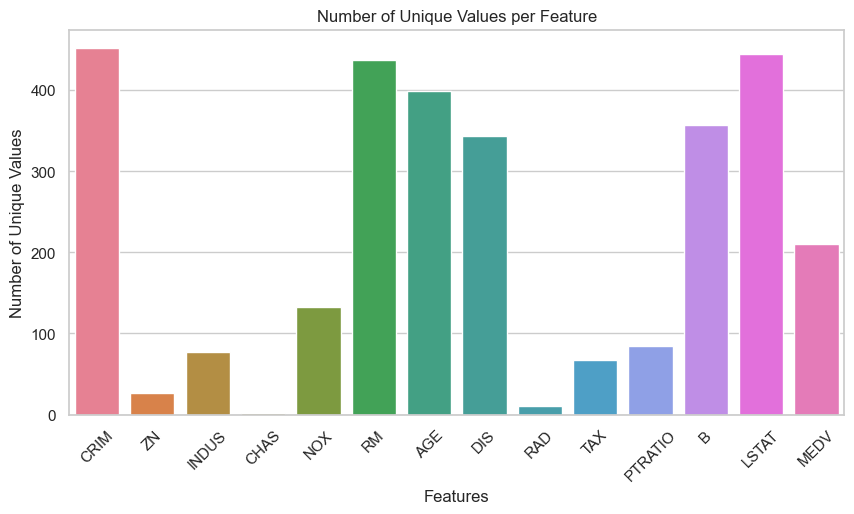

In [57]:
unique_values = df.nunique()
print(unique_values)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
unique_values_plot = sns.barplot(x=unique_values.index, y=unique_values.values, hue=unique_values.index, legend=False)

plt.xticks(rotation=45)
plt.title('Number of Unique Values per Feature')
plt.ylabel('Number of Unique Values')
plt.xlabel('Features')

plt.show()

<p align="justify"><font color="#A9CCE3"><b>Explanation of the Chart</b></font></p>

<p align="justify"><font color="#A9CCE3"><b>Categorical vs. Continuous:</b></font> Features with a relatively small number of unique values compared to the sample size might be categorical or discretized continuous variables. Features with a large number of unique values are likely continuous.</p>

<p align="justify"><font color="#A9CCE3"><b>Data Quality and Preprocessing Needs:</b></font> If a categorical feature has an unexpectedly high number of unique values, this could indicate data quality issues or mislabeling. For instance, a feature that should have a limited set of values (like CHAS, which should only have 0 or 1) showing more can suggest data entry errors.</p>

<p align="justify"><font color="#A9CCE3"><b>Decision Making for Modeling:</b></font> Knowing the number of unique values helps in making decisions about encoding techniques for categorical data (e.g., one-hot encoding, label encoding) and might influence decisions on feature engineering.</p>


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.288969  0.586719 -0.108808 -0.139448 -0.185045  0.462470   
ZN      -0.288969  1.000000 -0.491587  0.027097  0.038450  0.078721 -0.488006   
INDUS    0.586719 -0.491587  1.000000 -0.278229 -0.394483 -0.448809  0.700699   
CHAS    -0.108808  0.027097 -0.278229  1.000000  0.750855  0.751928 -0.394058   
NOX     -0.139448  0.038450 -0.394483  0.750855  1.000000  0.975767 -0.550065   
RM      -0.185045  0.078721 -0.448809  0.751928  0.975767  1.000000 -0.595786   
AGE      0.462470 -0.488006  0.700699 -0.394058 -0.550065 -0.595786  1.000000   
DIS     -0.314674  0.273419 -0.613465  0.705812  0.923152  0.946355 -0.749412   
RAD     -0.151996  0.062767 -0.427834  0.757421  0.985957  0.992620 -0.585574   
TAX      0.754362 -0.256799  0.748951 -0.461679 -0.570346 -0.610962  0.635697   
PTRATIO -0.140015  0.049491 -0.351166  0.602163  0.775302  0.806522 -0.477048   
B       -0.076602  0.029200 

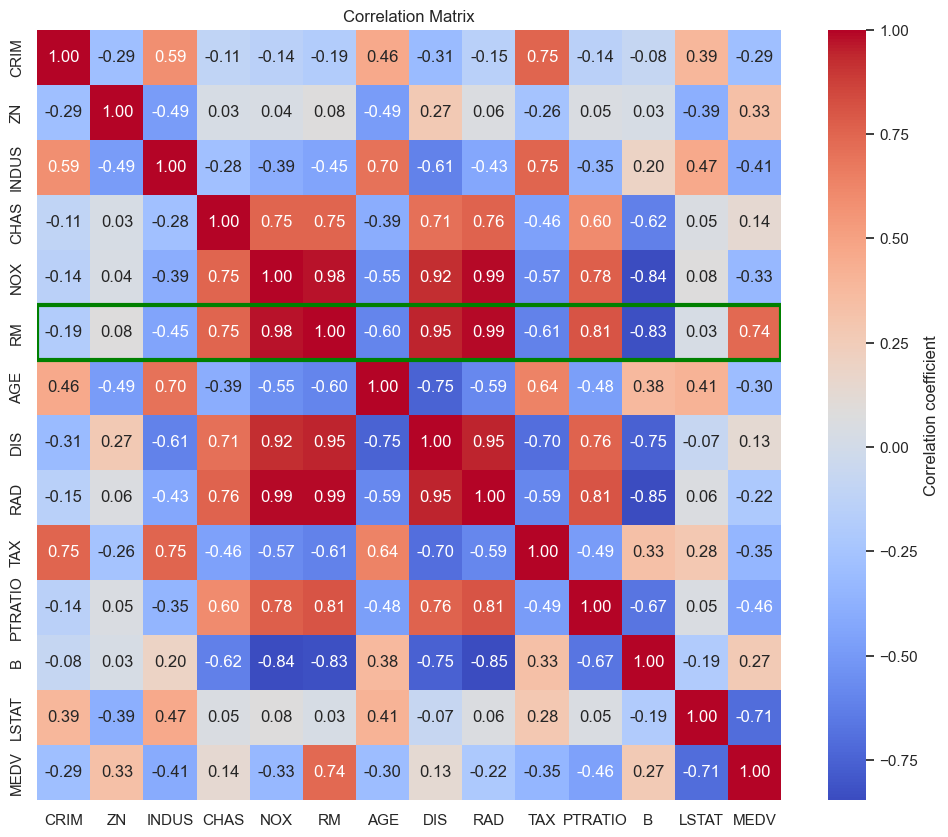

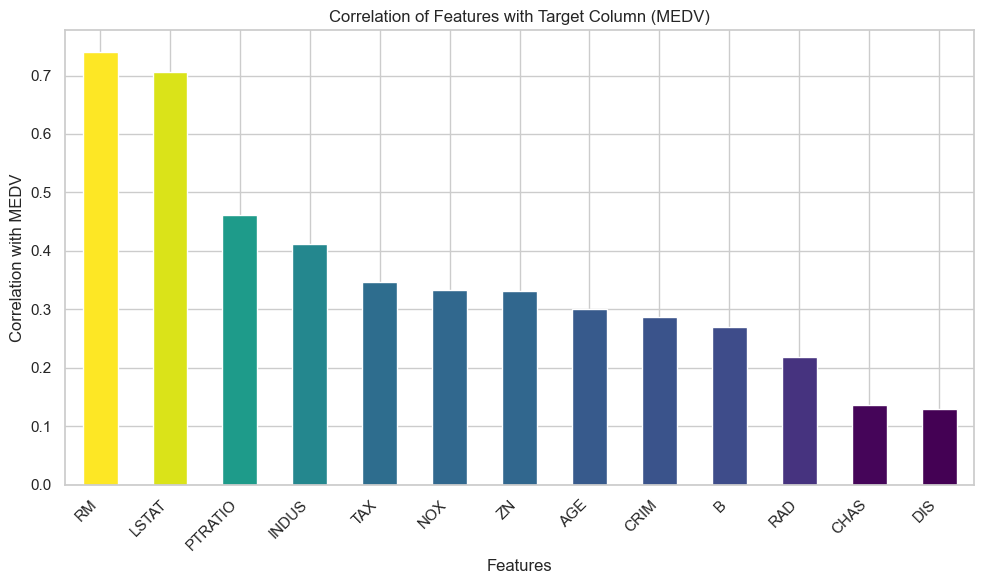

In [58]:
corr_matrix = df.corr()
print(corr_matrix)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
rectangle = plt.Rectangle((0, 5), corr_matrix.shape[1], 1, edgecolor='green', facecolor='none', lw=3)
plt.gca().add_patch(rectangle)
plt.show()

target_correlations = corr_matrix["MEDV"].drop("MEDV")
correlation_with_MEDV = target_correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis((correlation_with_MEDV - correlation_with_MEDV.min()) / (correlation_with_MEDV.max() - correlation_with_MEDV.min()))

correlation_with_MEDV.plot(kind='bar', color=colors)
plt.xlabel('Features')
plt.ylabel('Correlation with MEDV')
plt.title('Correlation of Features with Target Column (MEDV)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
target_corr = corr_matrix['MEDV'].drop('MEDV')
most_correlated_feature = target_corr.idxmax()
max_correlation_value = target_corr.max()

print("Most correlated feature:", most_correlated_feature)
print("Correlation coefficient:", max_correlation_value)

Most correlated feature: RM
Correlation coefficient: 0.7401808048912724


<p align="justify"><font size="5" color="#A9CCE3"><b>Explanation of the Correlation Matrix</b></font></p>

<p align="justify">
<b>In the heatmap:</b>
<ul>
  <li>Darker red colors indicate stronger positive correlations.</li>
  <li>Darker blue colors indicate stronger negative correlations.</li>
  <li>Light colors (near white) indicate weak or no correlation.</li>
</ul>
</p>

<p align="justify"><font size="5" color="#A9CCE3"><b>Analysis Regarding the Target Variable (MEDV)</b></font></p>

<p align="justify">
When analyzing the correlation with respect to MEDV, focus on the values in the MEDV row/column of the matrix. Features with high absolute values (close to 1 or -1) are more linearly correlated with the target variable. For example:
<ul>
  <li>If <b>RM</b> (average number of rooms per dwelling) shows a correlation coefficient of 0.7 with MEDV, this indicates a strong positive correlation, meaning that as the number of rooms increases, the median value of the houses tends to increase.</li>
  <li>Conversely, if <b>LSTAT</b> (% lower status of the population) shows a correlation coefficient of -0.7 with MEDV, this indicates a strong negative correlation, suggesting that higher values of LSTAT are associated with lower house values.</li>
</ul>
</p>

<p align="justify"><font size="5" color="#A9CCE3"><b>Important Considerations</b></font></p>

<p align="justify">
<ul>
  <li><b>Multicollinearity:</b> If two features are highly correlated with each other, it may be beneficial to consider removing or combining them before building a machine learning model to avoid multicollinearity, which can destabilize the model.</li>
  <li><b>Causation vs Correlation:</b> Correlation does not imply causation. Even if two features are correlated, it doesn’t necessarily mean one causes the other to change.</li>
  <li><b>Non-linear Relationships:</b> The correlation matrix only captures linear relationships. Some variables might be related in non-linear ways that this matrix would not reveal.</li>
</ul>
</p>


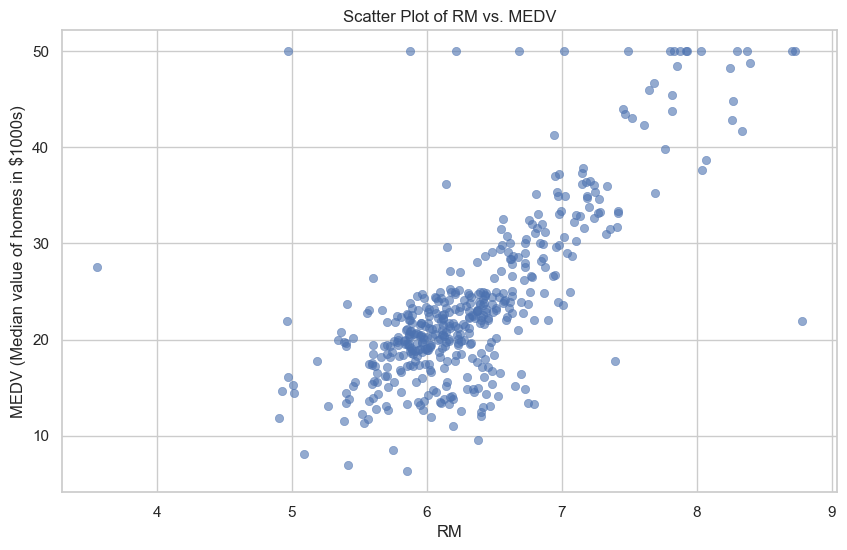

In [60]:
most_correlated_feature = 'RM'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[most_correlated_feature], y=df['MEDV'], alpha=0.6, edgecolor=None)
plt.title(f'Scatter Plot of {most_correlated_feature} vs. MEDV')
plt.xlabel(most_correlated_feature)
plt.ylabel('MEDV (Median value of homes in $1000s)')
plt.grid(True)
plt.show()

<p align="justify"><font size="5" color="#A9CCE3"><b>Scatter Plot</b></font></p>

<p align="justify">
A scatter plot visualizes individual data points on a two-dimensional plane, which is ideal for understanding the relationship between two continuous variables. It's particularly useful for spotting trends, correlations, and outliers.
</p>

<p align="justify">
<b>Application:</b> Use a scatter plot when you have a moderate number of data points. It helps in identifying linear or non-linear relationships, clusters, and outliers.
</p>

<p align="justify">
<b>Scatter Plot:</b> Gives a clear view of each data point. It's excellent for smaller datasets or when you want to specifically identify how individual values distribute against each other. It's straightforward but can become cluttered and less informative with very large datasets.
</p>


<Figure size 800x400 with 0 Axes>

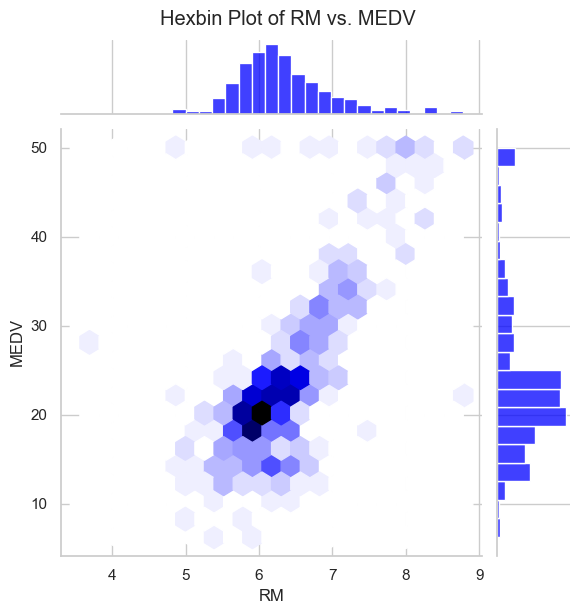

In [61]:
plt.figure(figsize=(8, 4))
sns.jointplot(x=df[most_correlated_feature], y=df['MEDV'], kind="hex", color="blue", gridsize=20)
plt.suptitle(f'Hexbin Plot of {most_correlated_feature} vs. MEDV', y=1.02)
plt.show()

<p align="justify"><font size="5" color="#A9CCE3"><b>Hexbin Plot</b></font></p>

<p align="justify">
Hexbin plots are a bivariate analogue of histograms and can be considered a binning version of a scatter plot where the bins have a hexagonal shape. As such, they are useful for representing the concentration of data points.
</p>

<p align="justify">
<b>Application:</b> Use a hexbin plot when dealing with large datasets or when data points overlap significantly in scatter plots. It helps in visualizing the density of data points in different regions of the plot.
</p>

<p align="justify">
<b>Hexbin Plot:</b> Aggregates nearby points into hexagonal bins, showing the density of data points. It's color-coded to represent these densities, making it particularly useful in revealing the underlying distribution where individual points would overlap too much in a scatter plot.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">Explore other analyses that you can perform on the dataset and implement one of them.</font></p>
<p align="justify">
Grouped Analysis of MEDV by Categorical Variables or Binned Quantitative Variables: Since the Boston housing dataset mostly contains numerical data, we can create categorical bins for some of the numerical features and examine how the median house values (MEDV) differ across these categories. This can provide insights into trends and patterns across different segments of the market.
</p>

<p align="justify">
For example, we can analyze the MEDV across different levels of crime rate (CRIM) and accessibility to highways (RAD). First, we’ll bin these variables into categories, then compute the average MEDV for each category to see if there are noticeable trends.
</p>

<p align="justify">
<b>Explanation of the Analysis:</b><br>
<b>CRIM Categories:</b> By categorizing CRIM into low, medium, and high, we can observe whether areas with higher crime rates tend to have lower median house values, which is a common hypothesis.<br>
<b>RAD Categories:</b> By examining how the median values differ across areas with different levels of accessibility to radial highways, we can determine if proximity to major transportation routes correlates with higher property values.
</p>

<p align="justify">
This type of grouped analysis is beneficial for identifying broader market trends and can inform both potential homebuyers and urban planners on how different factors influence housing prices in urban areas. It also provides a foundation for more detailed statistical analysis or predictive modeling.
</p>


Average MEDV by CRIM Category:
 CRIM_cat
Low       27.377391
Medium    23.080357
High      21.948521
Name: MEDV, dtype: float64

Average MEDV by RAD Category:
 RAD_cat
Low     24.695989
High    19.216667
Name: MEDV, dtype: float64


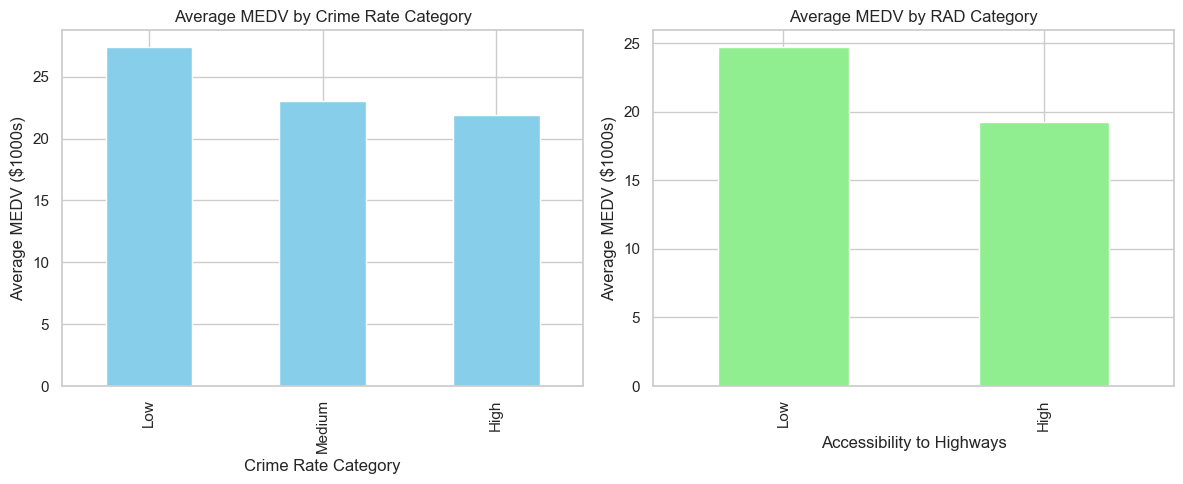

In [62]:
dfCopy = df.copy()

dfCopy['CRIM_cat'] = pd.qcut(dfCopy['CRIM'], 3, labels=['Low', 'Medium', 'High'])

bins = [0, 10, 20, 30]
labels = ['Low', 'Medium', 'High']
dfCopy['RAD_cat'] = pd.cut(dfCopy['RAD'], bins=bins, labels=labels, right=False)

avg_medv_by_crim = dfCopy.groupby('CRIM_cat', observed=True)['MEDV'].mean()
avg_medv_by_rad = dfCopy.groupby('RAD_cat', observed=True)['MEDV'].mean()

print("Average MEDV by CRIM Category:\n", avg_medv_by_crim)
print("\nAverage MEDV by RAD Category:\n", avg_medv_by_rad)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
avg_medv_by_crim.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average MEDV by Crime Rate Category')
axes[0].set_xlabel('Crime Rate Category')
axes[0].set_ylabel('Average MEDV ($1000s)')

avg_medv_by_rad.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average MEDV by RAD Category')
axes[1].set_xlabel('Accessibility to Highways')
axes[1].set_ylabel('Average MEDV ($1000s)')

plt.tight_layout()
plt.show()

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 3: Preprocessing the Dataset</b></font><br></p>

<p align="justify">
Before applying machine learning techniques to predict house prices in Boston, it's essential to preprocess the dataset to ensure the quality and effectiveness of the analysis. Preprocessing includes several key steps aimed at making the data suitable for a model.
</p>

<p align="justify">
<b><font color="#A9CCE3">Data Cleaning:</font></b> This first step involves removing or correcting any erroneous or missing data. For the Boston housing dataset, this could involve dealing with outliers in features like RM (average number of rooms per dwelling) or ensuring that all entries are complete without any missing values.
</p>

<p align="justify">
<b><font color="#A9CCE3">Feature Scaling:</font></b> Since machine learning algorithms perform better when numerical input variables are on a similar scale, this step adjusts the scales of the features. Standardization (which transforms data to have zero mean and unit variance) or Min-Max scaling are commonly applied to ensure consistency across data points.
</p>

<p align="justify">
<b><font color="#A9CCE3">Encoding Categorical Data:</font></b> If there are any categorical variables in the dataset, such as CHAS (Charles River dummy variable indicating if tract bounds river), they need to be converted into numerical formats. Techniques like one-hot encoding or label encoding are used depending on the model requirements.
</p>

<p align="justify">
<b><font color="#A9CCE3">Feature Engineering:</font></b> This involves creating new features or modifying existing ones to enhance the model's predictive power. For example, creating bins for the age of the properties or combining existing features like tax rate and pupil-teacher ratio into a new composite feature could provide new insights and improve model performance.
</p>

<p align="justify">
<b><font color="#A9CCE3">Data Partitioning:</font></b> The dataset is split into training and test sets. Typically, the training set is used to train the machine learning model, while the test set is used to evaluate its performance. This helps in validating the effectiveness of the model and in tuning its parameters before it is deployed in a real-world scenario.
</p>

<p align="justify">
By carefully preprocessing the dataset, we lay a strong foundation for building a robust machine learning model that can accurately predict house prices in Boston.
</p>


In [63]:
class DataPreprocessor:
    def __init__(self, data):
        self.data = data

    def remove_missing_values(self):
        self.data.dropna(inplace=True)
        return self.data

    def impute_mean_median_mode(self, strategy='mean'):
        if strategy not in ['mean', 'median', 'mode']:
            raise ValueError("Strategy must be 'mean', 'median', or 'mode'")
        for column in self.data.columns:
            if self.data[column].dtype in [np.float64, np.int64] and strategy in ['mean', 'median']:
                imputer = SimpleImputer(strategy=strategy)
                self.data[column] = imputer.fit_transform(self.data[[column]])
            elif self.data[column].dtype == object and strategy == 'mode':
                imputer = SimpleImputer(strategy='most_frequent')
                self.data[column] = imputer.fit_transform(self.data[[column]])
            elif self.data[column].dtype == object:
                imputer = SimpleImputer(strategy='most_frequent')
                self.data[column] = imputer.fit_transform(self.data[[column]])
            else:
                pass
        return self.data

    def predictive_imputation(self):
        for column in self.data.columns:
            if self.data[column].isna().sum() > 0:
                model_data = self.data.dropna(subset=[column] + [col for col in self.data.columns if col != column])
                if not model_data.empty:
                    numeric_cols = model_data.select_dtypes(include=np.number).columns.tolist()
                    X = model_data[numeric_cols].drop(column, axis=1)
                    y = model_data[column]
                    model = LinearRegression()
                    model.fit(X, y)
                    predict_data = self.data[(self.data[column].isna()) & (self.data[numeric_cols].drop(column, axis=1).notna().all(axis=1))]
                    if not predict_data.empty:
                        predicted_values = model.predict(predict_data[numeric_cols].drop(column, axis=1))
                        self.data.loc[predict_data.index, column] = predicted_values
        return self.data

    def numeric_only(self):
        self.data = self.data.select_dtypes(include=[np.number])
        return self.data

    def remove_low_correlation(self, threshold=0.2):
        self.numeric_only()
        corr_matrix = self.data.corr()
        low_corr = corr_matrix['MEDV'].apply(lambda x: abs(x) < threshold)
        columns_to_drop = low_corr[low_corr].index.tolist()
        print(columns_to_drop)
        self.data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
        return self.data

    def remove_high_correlation(self, threshold=0.75):
        self.numeric_only()
        corr_matrix = self.data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
        print(to_drop)
        self.data.drop(columns=to_drop, inplace=True, errors='ignore')
        return self.data

<p align="justify"><font size="5" color="#A9CCE3"><b>Methods for Handling Missing Values</b></font></p>

<p align="justify">
<b>Removing Missing Values:</b> This method involves simply dropping rows or columns that contain missing values. It's straightforward but can lead to loss of a lot of data if many entries are missing.
</p>

<p align="justify">
<b>Imputation with Mean/Median/Mode:</b> This is a common method where missing values are filled with the mean, median, or mode of the column. The choice between mean, median, or mode generally depends on the distribution of the data. Mean is sensitive to outliers, whereas median is more robust. Mode is typically used for categorical data.
</p>

<p align="justify">
<b>Predictive Imputation:</b> This method involves using statistical models (like linear regression, decision trees, etc.) to predict and fill in missing values based on non-missing data. It can be more accurate but is computationally more expensive and complex to implement.
</p>

<p align="justify">
<b><font size="5" color="#A9CCE3">Reasons for Using Each Method:</font></b>
</p>
<p align="justify">
<b>Removing Missing Values:</b> Best when the dataset is large and the number of missing data points is small, so the impact on data integrity is minimal.
</p>
<p align="justify">
<b>Imputation with Mean/Median/Mode:</b> Useful when data is randomly missing and missingness is not informative. This method helps maintain the size of the dataset and is quick to implement.
</p>
<p align="justify">
<b>Predictive Imputation:</b> Suitable for cases where relationships between variables can be leveraged to make better imputations, especially when missing data is systematic and not random.
</p>


In [64]:
df_copy = df.copy()
preprocessor = DataPreprocessor(df_copy)
print("Original Data:\n", df)
# print("\nRemoved Missing Values Data:\n")

# print(preprocessor.remove_missing_values())
# print(preprocessor.impute_mean_median_mode('median'))
print(preprocessor.predictive_imputation())

Original Data:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.

#### <p align="justify"><font size="5" color="#d62b5b">Is it possible to delete some columns? Why? If it is possible, delete the necessary columns with a reason.</font></p>

<p align="justify">
Yes, it is indeed possible and sometimes necessary to delete columns from a dataset during the preprocessing stage. Here are some common reasons for deleting columns:
</p>

<p align="justify">
<b>Irrelevance to the Analysis:</b> If a column is not relevant to the specific questions or models being developed, it might be appropriate to remove it. This reduces the complexity of the data and can improve model performance by focusing only on pertinent features.
</p>

<p align="justify">
<b>High Percentage of Missing Values:</b> If a column has a very high proportion of missing values, and these values cannot be reliably imputed without introducing significant bias or inaccuracy, it might be better to remove the column altogether.
</p>

<p align="justify">
<b>High Correlation with Other Features (Multicollinearity):</b> If two or more columns are highly correlated, it can lead to multicollinearity in regression models, which can skew the results. Removing one of the highly correlated features can help in mitigating this issue.
</p>

<p align="justify">
<b>Low Variance:</b> If a column has very low variance (i.e., most of the values in the column are the same), it typically provides little information and may not be useful in predictive modeling.
</p>

<p align="justify">
<b>Data Leakage:</b> Columns that would not be available at the time of prediction in a real-world scenario, or that include information from the future (i.e., they leak data about the target), should be removed.
</p>


In [65]:
print("Original Data:\n", df.head())

print("\nData after removing low correlation columns:")
print(preprocessor.remove_low_correlation(0.2).head())

print("\nData after removing high correlation columns:")
print(preprocessor.remove_high_correlation(0.9).head())

Original Data:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data after removing low correlation columns:
['CRIM', 'ZN', 'LSTAT']
   INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO           B  \
0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.900000   
1   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.900000   
2   7.07   0.0  0.469  7.185  61.1

#### <p align="justify"><font size="5" color="#A9CCE3"><b>Numerical Features:</b></font></p>

<p align="justify">
These are features that represent a measurable quantity and can be either discrete or continuous.
</p>

<p align="justify">
<b>Discrete numerical features</b> often count something (like the number of rooms).
</p>

<p align="justify">
<b>Continuous numerical features</b> often measure something (like distance or weight).
</p>

<p align="justify">
Numerical features can be directly used in mathematical and statistical calculations.
</p>

#### <p align="justify"><font size="5" color="#A9CCE3"><b>Categorical Features:</b></font></p>

<p align="justify">
These are features that represent a quality or characteristic, typically grouped into categories.
</p>

<p align="justify">
Categorical features can be further divided into:
</p>

<p align="justify">
<b>Ordinal:</b> Categories have a meaningful order or ranking (e.g., small, medium, large).
</p>

<p align="justify">
<b>Nominal:</b> Categories do not have an order or ranking (e.g., types of soil, color).
</p>

<p align="justify">
Categorical features often need to be encoded or transformed before they can be used in many machine learning models.
</p>


In [66]:
def identify_feature_types(df):
    numerical_features = []
    categorical_features = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            if len(df[column].unique()) <= 10:
                categorical_features.append(column)
            else:
                numerical_features.append(column)
        else:
            categorical_features.append(column)

    return numerical_features, categorical_features

numerical_features, categorical_features = identify_feature_types(df)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical Features: ['CHAS', 'RAD']


#### <p align="justify"><font size="5" color="#d62b5b">In numerical features, what is the purpose of normalizing or standardizing? What is the difference between these two methods? Is there a need to do this in this project?</font></p>

<p align="justify">
When working on machine learning projects, such as predicting house prices with the Boston Housing Dataset, preprocessing the data is a crucial step. Specifically, the techniques of normalization and standardization are fundamental when dealing with numerical features. These methods adjust the scales of features, ensuring that no single feature dominates the input to a model due to its scale. This is particularly important for models that rely on the distance between data points or that are sensitive to the magnitude of features.
</p>

<p align="justify">
<b>Normalization (Min-Max Scaling)</b>
</p>

<p align="justify">
Normalization involves rescaling the data to a specific range, typically between 0 and 1, or -1 to 1. The formula used is:
</p>

$$𝑋norm =  \frac{𝑋−𝑋min}{𝑋max−𝑋min}$$

<p align="justify">
This method is useful because it maintains the proportions within the data without distorting differences in the ranges of values, preserving the original distribution. However, it's important to note that normalization can be sensitive to outliers, which may compress the rest of the data into a narrow range.
</p>

<p align="justify">
<b>Standardization (Z-score Normalization)</b>
</p>

<p align="justify">
Standardization, on the other hand, transforms data to have a mean of 0 and a standard deviation of 1 using the formula:
</p>

$$𝑋std =  \frac{𝑋−𝜇 }{𝜎}$$

<p align="justify">
where μ is the mean and σ is the standard deviation. This approach is beneficial because it is less affected by outliers and helps in faster convergence of gradient descent algorithms, which are common in machine learning.
</p>

<p align="justify">
<b>When to Use These Techniques in Projects</b>
</p>

<p align="justify">
The choice between normalization and standardization depends on the type of models intended for use:
</p>

<p align="justify">
For Gradient Descent-Based Algorithms: If models like linear regression, logistic regression, or neural networks are used, standardization is generally preferred as these models benefit from features that are on a similar scale, facilitating faster convergence.
</p>

<p align="justify">
For Distance-Based Algorithms: If models include k-nearest neighbors or support vector machines, which are sensitive to the scale of input features, either normalization or standardization is crucial to prevent features with larger scales from dominating the distance calculation.
</p>

<p align="justify">
For Tree-Based Algorithms: If employing models like decision trees or random forests, feature scaling is not typically necessary, as these models are invariant to the scale of the features.
</p>

<p align="justify">
Considering these points, if the project uses models sensitive to feature scale, implementing standardization or normalization would be a wise choice to improve model performance and ensure that all features contribute equally to the prediction.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">For categorical features, which are usually stored as strings or objects in the dataset, what preprocessing is useful in model training?</font></p>

<p align="justify">
Categorical features stored as strings or objects in a dataset require preprocessing to convert them into a format that machine learning algorithms can work with effectively. Here are several common preprocessing techniques that are useful for categorical data:
</p>

<p align="justify">
<b>Encoding:</b> Since most machine learning models require numerical input, categorical variables must be converted into numerical format. Two popular methods for this are:
</p>

<ul>
<li><b>One-Hot Encoding:</b> This method converts each category value into a new binary column, which takes the value 1 if the category is present or 0 if not. This method is especially useful for nominal categorical data without an intrinsic ordering. However, it can lead to a high dimensionality in the dataset if the categorical feature has many unique values.</li>
<li><b>Label Encoding:</b> This technique assigns each unique category a numerical value. It is straightforward but introduces an ordinal relationship, which might not be present, hence possibly leading to poor model performance for certain algorithms, particularly those sensitive to numerical distances like linear regression and SVM.</li>
</ul>

<p align="justify">
<b>Target Encoding:</b> This approach involves replacing a categorical value with a number derived from the target variable, such as the mean. It is beneficial when the categorical variable has many categories and preserves potential information about the target variable, but it risks overfitting and data leakage.
</p>

<p align="justify">
<b>Frequency Encoding:</b> Here, categories are replaced with their frequencies or the count of their occurrences in the dataset. This method can help preserve the importance of a category's prevalence without adding many new features like one-hot encoding.
</p>

<p align="justify">
<b>Binary Encoding:</b> This technique combines the features of both label and one-hot encoding by converting the integers obtained through label encoding into binary format, thus requiring fewer new features than one-hot encoding.
</p>

<p align="justify">
Choosing the right preprocessing technique for categorical data depends on the specific dataset and the type of model being used. It's important to consider the inherent characteristics of the data and the assumptions underlying the machine learning algorithms during preprocessing.
</p>


In [67]:
target = 'MEDV'

X = df.drop(columns=[target])
y = df[target]

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation Data Shape: {X_val.shape}, {y_val.shape}")
print(f"Testing Data Shape: {X_test.shape}, {y_test.shape}")

Training Data Shape: (354, 13), (354,)
Validation Data Shape: (76, 13), (76,)
Testing Data Shape: (76, 13), (76,)


#### <p align="justify"><font size="5" color="#d62b5b">Understanding Test, Train, and Validation Data Splits</font></p>

<p align="justify">
In machine learning, it is crucial to split the dataset into separate subsets to train models, tune their parameters, and test their performance. These subsets typically include training data, validation data, and testing data.
</p>

<p align="justify">
<b>Training Data:</b>
</p>

<p align="justify">
This is the largest portion of the dataset used to train the machine learning model. The model learns and tries to generalize from this data. It is through this data that the model gets exposed to the underlying patterns which it must capture to make future predictions.
</p>

<p align="justify">
<b>Validation Data:</b>
</p>

<p align="justify">
Validation data is used to evaluate a model during the training phase, providing an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. This helps in avoiding overfitting. The validation set is crucial for selecting the best model version during training when models are compared based on their performance on this dataset.
</p>

<p align="justify">
<b>Testing Data:</b>
</p>

<p align="justify">
The test dataset provides the final, unbiased performance evaluation of the final model fit on the training dataset. This data is used only once a model is completely trained (using the train and validation sets). The test set evaluates how well the model generalizes to new, unseen data.
</p>

<p align="justify">
<b>Common Methods of Partitioning:</b>
</p>

<p align="justify">
<b>Holdout Method:</b>
The dataset is divided into two parts: training and testing. Sometimes, a third part, the validation set, is also created from the training set.
Common splits are 70/30 or 80/20 between training and testing.
</p>

<p align="justify">
<b>K-Fold Cross-Validation:</b>
The dataset is split into 'k' consecutive folds.
Each fold acts as a validation set (once) and acts as a part of the training set 'k-1' times.
This method is beneficial for making the most out of smaller datasets.
</p>

<p align="justify">
<b>Stratified Sampling:</b>
Used primarily for classification problems where the dataset is split such that the random samples have approximately the same percentage of samples of each target class as the complete set.
</p>

<p align="justify">
<b>Time Series Split:</b>
This is a method where the order of the data is important (e.g., stock prices over time).
Data is split into train/test sets over time. For example, data from previous years might form the training set, and data from the current year might form the test set.
</p>


In [68]:
df_copy['ROOMS_AGE_INTERACTION'] = df['RM'] * df['AGE']

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=200000)
df_copy['LSTAT_DISCRETE'] = est.fit_transform(df[['LSTAT']])

print(df_copy.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO           B  LSTAT  MEDV  ROOMS_AGE_INTERACTION  LSTAT_DISCRETE  
0     15.3  396.900000   4.98  24.0               428.6900             0.0  
1     17.8  396.900000   9.14  21.6               506.6169             1.0  
2     17.8  392.830000   4.03  34.7               439.0035             0.0  
3     18.7  406.178949   2.94  33.4               320.5084             0.0  
4     18.7  396.900000   5.33  36.2               387.3674             0.0  


#### <p align="justify"><font size="5" color="#d62b5b">Common Preprocessing Methods</font></p>

<p align="justify">
<b>Handling Missing Values:</b><br>
As discussed earlier, missing data can be handled by imputation, deletion, or prediction. The choice depends on the pattern and amount of missing data, as well as the importance of retaining full data samples for analysis.
</p>

<p align="justify">
<b>Feature Scaling:</b><br>
Including normalization and standardization, feature scaling is essential for models that rely on numerical data which needs to be on the same scale. This step is crucial for algorithms that calculate distances between data points.
</p>

<p align="justify">
<b>Encoding Categorical Variables:</b><br>
Machine learning models typically work on numerical input. Categorical variables are converted into numerical values through techniques like one-hot encoding or label encoding.
</p>

<p align="justify">
<b>Feature Engineering:</b><br>
Creating new features from existing data can provide additional insights to models. This might involve extracting dates, creating interaction terms, or aggregating features to create new combinations.
</p>

<p align="justify">
<b>Dimensionality Reduction:</b><br>
Techniques like Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA) are used to reduce the number of random variables under consideration, by obtaining a set of principal variables. Useful in handling high-dimensional data and multicollinearity.
</p>

<p align="justify">
<b>Discretization:</b><br>
Transforming continuous features into discrete bins. This can be useful for certain types of models that handle categorical data better than numerical data.
</p>

<p align="justify">
<b>Text Data Preprocessing:</b><br>
For datasets containing text, steps might include tokenization, stemming, lemmatization, and removal of stop words. Additionally, converting text to vectors using methods like TF-IDF or word embeddings might be necessary.
</p>

<p align="justify">
<b>Handling Outliers:</b><br>
Outliers can skew and mislead the training process of machine learning models resulting in longer training times, less accurate models, and ultimately poorer results. They can be dealt with by methods like trimming (removing), capping, or using robust scaling techniques.
</p>


<p align="justify"><font size="5" color="#A9CCE3"><b>Section 4: Linear Regression</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">In this project, we are implementing supervised machine learning models. What is the difference between these models and unsupervised, semi-supervised, and reinforcement learning models? Provide an example for each.</font></p>

<p align="justify">
<b>Supervised Learning:</b> In supervised learning, the model is trained on a labeled dataset, meaning that each input data point is paired with an output label. The model learns to predict the output from the input data. <b>Example:</b> Predicting housing prices based on features such as size, location, and number of bedrooms.
</p>

<p align="justify">
<b>Unsupervised Learning:</b> Unlike supervised learning, unsupervised learning involves training a model on data that does not have labeled outputs. Hence, the goal is to infer the natural structure present within a set of data points. <b>Example:</b> Clustering customers into different groups based on purchasing behavior.
</p>

<p align="justify">
<b>Semi-supervised Learning:</b> Semi-supervised learning falls between supervised and unsupervised learning. The model is trained on a combination of labeled and unlabeled data. This approach is used when obtaining a fully labeled dataset is expensive or impractical. <b>Example:</b> Using a small amount of labeled image data and a large amount of unlabeled image data to train a model to recognize objects.
</p>

<p align="justify">
<b>Reinforcement Learning:</b> Reinforcement learning is a type of machine learning where an agent learns to make decisions by performing certain actions and receiving rewards or penalties. It learns through trial and error to achieve a defined objective. <b>Example:</b> A robotics system learns to walk without falling by repeatedly trying different movements and adjusting based on successful outcomes and failures.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">What is regression, and what are the differences between it and classification methods?</font></p>

<p align="justify">
<b>Regression:</b> Regression is a type of supervised learning model that predicts a continuous outcome. The objective in regression is to find a relationship between one or more predictors (independent variables) and a continuous dependent variable. <b>Example:</b> Predicting the price of a house based on its size, location, and age.
</p>

<p align="justify">
<b>Differences between Regression and Classification:</b>
<ul>
  <li><b>Output Type:</b> The key difference lies in the output variable. In regression, the output is a continuous value, such as temperature or price. In classification, the output is categorical, such as 'spam' or 'not spam' in an email filtering system.</li>
  <li><b>Type of Analysis:</b> Regression is used for predicting the value of a variable based on the input data, whereas classification is used for predicting which category an observation belongs to.</li>
  <li><b>Measurement of Accuracy:</b> Accuracy in regression is measured through error metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE). In classification, accuracy is typically measured by the percentage of correctly predicted instances.</li>
  <li><b>Algorithms:</b> Different algorithms are used for each type. Common regression algorithms include linear regression and decision trees for regression. Classification algorithms include logistic regression, decision trees for classification, and support vector machines.</li>
</ul>
</p>


Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

$$ RSS = \sum_{i=1}^{n} (y_i - \hat{𝑦_i})^2 $$
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{𝑦_i})^2 $$
$$ RMSE = \sqrt{MSE}$$
$$ R^2 = 1 - \frac{RSS}{TSS}$$

In [69]:
class Regression:
    def __init__(self):
        self.intercept = 0
        self.slope = 0

    def linear_regression(self, input_feature, output):
        valid = ~(np.isnan(input_feature) | np.isnan(output))
        input_feature = input_feature[valid]
        output = output[valid]
        xbar = np.mean(input_feature)
        ybar = np.mean(output)
        alpha = np.sum((input_feature - xbar) * (output - ybar)) / np.sum(np.power(input_feature - xbar, 2))
        beta = ybar - alpha * xbar
        return (alpha, beta)

    def get_regression_predictions(self, input_feature, intercept, slope):
        return intercept + slope * input_feature

    def get_root_mean_square_error(self, predicted_values, actual_values):
        valid = ~(np.isnan(predicted_values) | np.isnan(actual_values))
        mean_square = np.nanmean((predicted_values[valid] - actual_values[valid]) ** 2)
        return np.sqrt(mean_square)

    def get_r2_score(self, predicted_values, outputs):
        valid = ~(np.isnan(predicted_values) | np.isnan(outputs))
        predicted_values = predicted_values[valid]
        outputs = outputs[valid]

        sum_square = np.nansum((predicted_values - outputs) ** 2)
        var_true = len(outputs) * np.var(outputs)
        return (1 - (sum_square / var_true))

    def plot_regression_line(self, input_feature, output):
        slope, intercept = self.linear_regression(input_feature, output)

        plt.figure(figsize=(10, 6))
        plt.scatter(input_feature, output, color='blue', label='Actual data')

        x_values = np.array([0, 12])
        y_values = intercept + slope * x_values

        plt.plot(x_values, y_values, color='red', label=f'Regression line: y = {slope:.2f}x + {intercept:.2f}')

        plt.xlabel('Input Feature')
        plt.ylabel('Output')
        plt.title('Regression Line with Data Points')
        plt.legend()
        plt.show()

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        correlation_matrix = df.corr(numeric_only=True)
        target_correlations = correlation_matrix[target].drop(target)
        sorted_correlations = target_correlations.abs().sort_values(ascending=False)
        designated_feature_list = sorted_correlations.index[:4]
        print(f"{'Feature': <{18}} {'R2': <{4}}  {'rmse'}")

        r2_scores = []
        rmse_scores = []

        for feature in designated_feature_list:
            alpha, beta = self.linear_regression(X_train[feature].to_numpy(), y_train.to_numpy().flatten())
            predicted = self.get_regression_predictions(X_test[feature].to_numpy(), beta, alpha)
            r2_score = self.get_r2_score(predicted, y_test.to_numpy().flatten())
            rmse = self.get_root_mean_square_error(predicted, y_test.to_numpy().flatten())

            r2_scores.append(r2_score)
            rmse_scores.append(rmse)

            print(f"{feature: <{18}} {r2_score:.2f}  {rmse:.2f}")

        mean_r2_score = max(r2_scores)
        mean_rmse_score = max(rmse_scores)

        return mean_r2_score, mean_rmse_score

Feature            R2    rmse
RM                 0.24  7.24
LSTAT              0.42  6.36
PTRATIO            0.21  7.37
INDUS              0.14  7.73


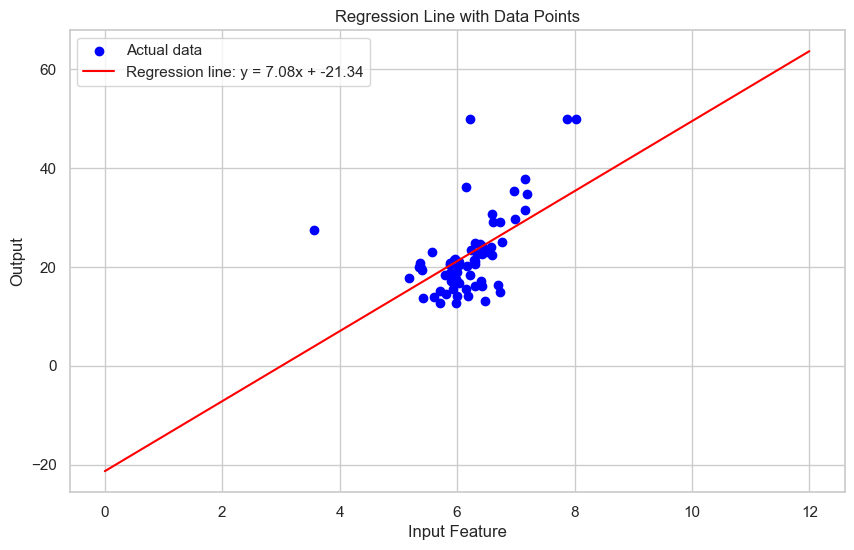

In [70]:
regression = Regression()
regression.evaluate_model(X_train, y_train, X_test, y_test)
regression.plot_regression_line(X_test["RM"].to_numpy(), y_test.to_numpy().flatten())

In [71]:
def evaluate_model(X_train, y_train, X_val, y_val):
    regression = Regression()
    r2, rmse = regression.evaluate_model(X_train, y_train, X_val, y_val)
    return r2, rmse

def preprocess_and_evaluate(df, preprocess_strategy):
    df_copy = df.copy()
    preprocessor = DataPreprocessor(df_copy)

    if preprocess_strategy == "remove_missing":
        df_copy = preprocessor.remove_missing_values()
    elif preprocess_strategy == "impute_mean":
        df_copy = preprocessor.impute_mean_median_mode(strategy='mean')
    elif preprocess_strategy == "impute_median":
        df_copy = preprocessor.impute_mean_median_mode(strategy='median')
    elif preprocess_strategy == "impute_mode":
        df_copy = preprocessor.impute_mean_median_mode(strategy='mode')
    elif preprocess_strategy == "predictive_imputation":
        df_copy = preprocessor.predictive_imputation()

    target = 'MEDV'
    X = df_copy.drop(columns=[target])
    y = df_copy[target]

    X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

    return evaluate_model(X_train, y_train, X_val, y_val)

def find_best_preprocessing(df):
    strategies = ["remove_missing", "impute_mean", "impute_median", "impute_mode", "predictive_imputation"]
    best_r2 = -np.inf
    best_rmse = np.inf
    best_strategy = None

    for strategy in strategies:
        r2, rmse = preprocess_and_evaluate(df, strategy)
        print(f"Strategy: {strategy}, R2: {r2:.4f}, RMSE: {rmse:.4f}")
        if r2 > best_r2 and rmse < best_rmse:
            best_r2 = r2
            best_rmse = rmse
            best_strategy = strategy
        print()

    print(f"Best Strategy: {best_strategy}, Best R2: {best_r2:.4f}, Best RMSE: {best_rmse:.4f}")

find_best_preprocessing(df)

Feature            R2    rmse
RM                 0.41  6.09
LSTAT              0.44  5.91
PTRATIO            0.05  7.73
INDUS              0.03  7.81
Strategy: remove_missing, R2: 0.4435, RMSE: 7.8058

Feature            R2    rmse
RM                 -0.03  7.89
LSTAT              0.45  5.74
PTRATIO            -0.04  7.90
INDUS              0.21  6.89
Strategy: impute_mean, R2: 0.4524, RMSE: 7.8962

Feature            R2    rmse
RM                 -0.04  7.90
LSTAT              0.46  5.70
PTRATIO            -0.04  7.89
INDUS              0.18  7.00
Strategy: impute_median, R2: 0.4596, RMSE: 7.8974

Feature            R2    rmse
RM                 0.75  4.10
LSTAT              0.47  5.92
PTRATIO            0.27  6.94
INDUS              0.25  7.06
Strategy: impute_mode, R2: 0.7462, RMSE: 7.0594

Feature            R2    rmse
RM                 0.91  35.01
LSTAT              -0.00  115.75
PTRATIO            0.33  94.57
INDUS              0.16  105.67
Strategy: predictive_imputation, R2: 0

#### <p align="justify"><font size="5" color="#d62b5b">Explore the methods of RMSE, MSE, RSS, and R2 score and explain each in your report.</font></p>

<p align="justify">
<b>Mean Squared Error (MSE):</b> MSE is a measure of the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It is a widely used risk metric to gauge the average magnitude of the errors in a set of predictions, without considering their direction. MSE is always non-negative, and values closer to zero are better.
</p>

<p align="justify">
<b>Root Mean Squared Error (RMSE):</b> RMSE is the square root of the mean of the squared errors. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. The lower the RMSE, the better the model's performance.
</p>

<p align="justify">
<b>Residual Sum of Squares (RSS):</b> RSS is the sum of the squares of residuals. Residuals are a measure of how far from the regression line data points are; RSS is a measure of how well a line can be drawn to take into account all of those points. A smaller RSS indicates a tighter fit of the model to the data.
</p>

<p align="justify">
<b>R-squared (R2) Score:</b> R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. An R2 score of 1 indicates that the regression predictions perfectly fit the data.
</p>


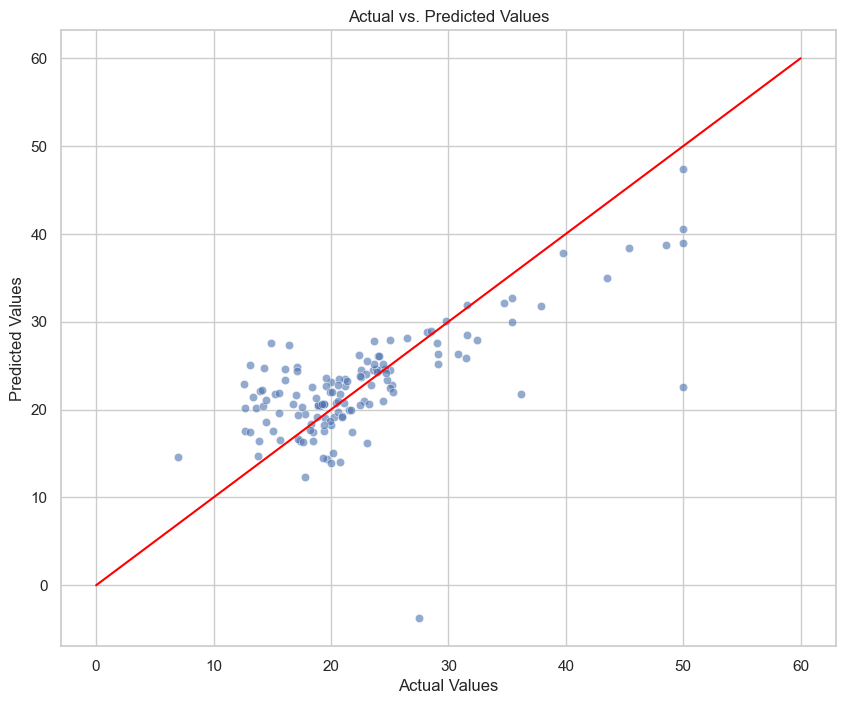

In [72]:
def plot_predictions_vs_actual(actual, predicted):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=actual, y=predicted, alpha=0.6)

    plt.plot([0, 60], [0, 60], color='red')

    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_copy = df.copy()
preprocessor = DataPreprocessor(df_copy)
preprocessor.impute_mean_median_mode(strategy='mode')
correlation_matrix = df_copy.corr(numeric_only=True)
target_correlations = correlation_matrix[target].drop(target)
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
feature = sorted_correlations.index[0]

alpha, beta = regression.linear_regression(X_train[feature].to_numpy(), y_train.to_numpy().flatten())
predicted = regression.get_regression_predictions(X_test[feature].to_numpy(), beta, alpha)
plot_predictions_vs_actual(y_test.to_numpy().flatten(), predicted)

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 5: Classification</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">What is the concept of pruning in decision trees? Mention the advantages and disadvantages of using this method.</font></p>

<p align="justify">
<b>Pruning in Decision Trees:</b> Pruning is a technique used in decision trees to reduce the size of the tree by removing sections of the tree that provide little power in classifying instances. This process reduces the complexity of the final model, which helps in alleviating overfitting and improves the model’s generalization abilities on unseen data. Pruning can be done by removing nodes that have little impact on the decision or by merging them with other nodes.
</p>

<p align="justify">
<b>Advantages of Pruning:</b>
</p>
<ul>
<li><b>Reduces Overfitting:</b> By removing less significant nodes, pruning helps in reducing the model’s complexity, which decreases the risk of overfitting on the training data.</li>
<li><b>Improves Model Generalization:</b> Simplified trees tend to perform better on unseen data because they capture the most significant patterns rather than memorizing the data.</li>
<li><b>Decreases Model Complexity:</b> A smaller tree is easier to interpret and faster to execute, which is particularly beneficial in real-time applications.</li>
</ul>

<p align="justify">
<b>Disadvantages of Pruning:</b>
</p>
<ul>
<li><b>Potential for Underfitting:</b> Over-pruning can lead to underfitting, where the tree is too simple to capture important patterns in the data, resulting in poor performance on both training and test sets.</li>
<li><b>Loss of Information:</b> Removing branches might lead to loss of valuable information that could be important for classification or regression tasks under certain conditions.</li>
<li><b>Complexity in Choosing the Right Pruning Technique:</b> Determining the optimal level of pruning can be challenging and typically requires cross-validation to ensure the model performs well on unseen data.</li>
</ul>


#### <p align="justify"><font size="5" color="#d62b5b">What is the intrinsic difference between the KNN classifier and other classification methods like neural networks or logistic regression? (Pay attention to how each classifier is trained.).</font></p>

<p align="justify">
The intrinsic difference between the K-nearest neighbors (KNN) classifier and other classification methods such as neural networks or logistic regression primarily lies in how each classifier is trained and makes predictions. 
</p>

<p align="justify">
<b>KNN Classifier:</b> KNN is a non-parametric, instance-based learning algorithm. In KNN, training involves simply storing the dataset; no explicit model training phase is required. During prediction, KNN classifies a new data point based on the majority vote of the 'k' nearest points in the feature space. The choice of 'k' and the distance metric (like Euclidean or Manhattan distance) are crucial. KNN is very sensitive to the local data structure.
</p>

<p align="justify">
<b>Neural Networks:</b> Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, or clustering of raw input. The networks use a series of algorithms to learn and recognize patterns from complex data and involve adjusting weights through backpropagation based on the errors in prediction during training. This method requires a substantial amount of data and computational power, especially for deep learning models.
</p>

<p align="justify">
<b>Logistic Regression:</b> Logistic regression, in contrast to KNN, is a parametric approach where a model is explicitly trained. It involves estimating parameters using a logistic function to predict binary outcomes. During training, parameters (coefficients) are learned using techniques like maximum likelihood estimation to best fit the model to the data. Logistic regression assumes linear relationships between the predictors and the log-odds of the outcomes.
</p>

<p align="justify">
<b>Key Differences in Training:</b> The fundamental difference lies in the fact that KNN does not "learn" from the training data in a conventional sense but memorizes the dataset, while neural networks and logistic regression actively learn and adjust parameters based on the data to minimize prediction errors. This aspect of KNN makes it uniquely fast at training but potentially slower and more resource-intensive during prediction, especially with large datasets. In contrast, once trained, neural networks and logistic regression can quickly make predictions.
</p>


<p align="justify"><font size="5" color="#d62b5b">Research the one nearest neighbor algorithm, mention its advantages and disadvantages, and also research distance measurement methods in the KNN algorithm and discuss a few of them.</font></p>

<p align="justify">
The One Nearest Neighbor (1-NN) algorithm is a simple variant of the K-nearest neighbors (KNN) algorithm where the number of neighbors 'k' is set to 1. This means that for each query instance, the algorithm finds the single closest training example and assigns its label to the query.
</p>

<p align="justify">
<b>Advantages of 1-NN:</b>
<ul>
<li><b>Simplicity:</b> The algorithm is extremely easy to implement and understand.</li>
<li><b>Low Training Time:</b> Since there is no actual training phase other than storing the data, it requires minimal computation at this stage.</li>
<li><b>Flexibility:</b> It can be used for both classification and regression tasks.</li>
</ul>
</p>

<p align="justify">
<b>Disadvantages of 1-NN:</b>
<ul>
<li><b>High Sensitivity to Noise:</b> Since the prediction is entirely dependent on the nearest neighbor, the presence of noise can lead to incorrect predictions.</li>
<li><b>Computationally Intensive:</b> Requires a significant amount of computation during the prediction phase, as it needs to compute the distance from all stored instances to the query instance.</li>
<li><b>Poor Generalization:</b> Tends to overfit the data, especially if the dataset is not homogeneous.</li>
</ul>
</p>

<p align="justify">
<b>Distance Measurement Methods in KNN:</b> The choice of distance metric can significantly influence the performance of the KNN algorithm. Here are a few commonly used methods:
<ul>
<li><b>Euclidean Distance:</b> The most common distance metric used, calculated as the square root of the sum of the squared differences between corresponding elements of two vectors. Represented as:
<br><span style="font-family: 'Courier New', monospace;">√(Σ(p<sub>i</sub> - q<sub>i</sub>)²)</span></li>
<li><b>Manhattan Distance:</b> Also known as taxicab or city block distance, it is the sum of the absolute differences of their Cartesian coordinates. Often used in high-dimensional spaces. Represented as:
<br><span style="font-family: 'Courier New', monospace;">Σ|p<sub>i</sub> - q<sub>i</sub>|</span></li>
<li><b>Minkowski Distance:</b> A generalization of the Euclidean and Manhattan distances. It includes a parameter 'r' that allows different metrics to be derived according to the value of 'r'. Represented as:
<br><span style="font-family: 'Courier New', monospace;">(Σ|p<sub>i</sub> - q<sub>i</sub>|<sup>r</sup>)<sup>1/r</sup></span></li>
<li><b>Cosine Similarity:</b> Measures the cosine of the angle between two vectors, used primarily in text classification where the magnitude of the vector may not be as important as the angle between vectors. Represented as:
<br><span style="font-family: 'Courier New', monospace;">(Σp<sub>i</sub> * q<sub>i</sub>) / (√Σp<sub>i</sub>² * √Σq<sub>i</sub>²)</span></li>
</ul>
</p>

<p align="justify">
These distance measurements provide flexibility in adapting the KNN algorithm to various types of data characteristics, potentially improving the efficiency and accuracy of the model based on the nature of the dataset being analyzed.
</p>


In [73]:
class Classification:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
        self.data[self.target_column] = pd.to_numeric(self.data[self.target_column], errors='coerce')
        self.data = self.data.dropna(subset=[self.target_column])

        categorized_target = self.categorize_target(self.data[self.target_column])
        self.data[self.target_column] = categorized_target.astype('category')

        if self.data[self.target_column].dtype == 'object':
            le = LabelEncoder()
            self.data[self.target_column] = le.fit_transform(self.data[self.target_column])

        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def categorize_target(self, target):
        bins = target.quantile([0, 0.2, 0.8, 1])
        labels = ['economical', 'standard', 'luxury']
        categorized_target = pd.cut(target, bins=bins, labels=labels, include_lowest=True)
        return categorized_target

    def set_knn_params(self, n_neighbors, weights, show = True):
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn.fit(self.X_train, self.y_train)

        if(show):
            print("KNN Test Score:", knn.score(self.X_test, self.y_test))
            print("KNN Classification Report:\n", classification_report(self.y_test, knn.predict(self.X_test)))

    def set_decision_tree_params(self, max_depth, min_samples_split, min_samples_leaf, show = True):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        dt.fit(self.X_train, self.y_train)
        if(show):
            print("Decision Tree Test Score:", dt.score(self.X_test, self.y_test))
            print("Decision Tree Classification Report:\n", classification_report(self.y_test, dt.predict(self.X_test)))
        plt.figure(figsize=(20,10))
        plot_tree(dt, filled=True, feature_names=self.data.columns.drop(self.target_column), class_names=np.unique(self.y_train).astype(str))
        plt.title("Decision Tree Visualization")
        plt.show()

    def train_knn(self, params, show = True):
        knn = KNeighborsClassifier()
        clf = GridSearchCV(knn, params, cv=5)
        clf.fit(self.X_train, self.y_train)
        if(show):
            print("Best KNN Params:", clf.best_params_)
            print("Best KNN Score:", clf.best_score_)
            print("KNN Test Score:", clf.score(self.X_test, self.y_test))
            print("KNN Classification Report:\n", classification_report(self.y_test, clf.predict(self.X_test)))
        return clf

    def train_decision_tree(self, params, show = True):
        dt = DecisionTreeClassifier()
        clf = GridSearchCV(dt, params, cv=5)
        clf.fit(self.X_train, self.y_train)
        if(show):
            print("Best Decision Tree Params:", clf.best_params_)
            print("Best Decision Tree Score:", clf.best_score_)
            print("Decision Tree Test Score:", clf.score(self.X_test, self.y_test))
            print("Decision Tree Classification Report:\n", classification_report(self.y_test, clf.predict(self.X_test)))
        if(show):
            plt.figure(figsize=(20,10))
            plot_tree(clf.best_estimator_, filled=True, feature_names=self.data.columns.drop(self.target_column), class_names=np.unique(self.y_train).astype(str))
            plt.title("Decision Tree Visualization")
            plt.show()
        return clf
    
    def plot_learning_curve(self, estimator, title, X, y, ylim=None, cv=None,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt

    def evaluate_learning_curve(self, model, title, cv=5):
        self.plot_learning_curve(model, title, self.X_train, self.y_train, cv=cv)
        plt.show()

dfClassification = pd.read_excel('DataSet.xlsx')
preprocessor = DataPreprocessor(dfClassification)
preprocessor.predictive_imputation()

model = Classification(dfClassification.copy(), 'MEDV')
model.prepare_data()

KNN Test Score: 0.8080808080808081
KNN Classification Report:
               precision    recall  f1-score   support

  economical       0.83      0.65      0.73        23
      luxury       0.86      0.67      0.75        18
    standard       0.79      0.91      0.85        58

    accuracy                           0.81        99
   macro avg       0.83      0.74      0.78        99
weighted avg       0.81      0.81      0.80        99

Decision Tree Test Score: 0.8080808080808081
Decision Tree Classification Report:
               precision    recall  f1-score   support

  economical       0.62      0.65      0.64        23
      luxury       1.00      0.89      0.94        18
    standard       0.83      0.84      0.84        58

    accuracy                           0.81        99
   macro avg       0.82      0.80      0.81        99
weighted avg       0.81      0.81      0.81        99



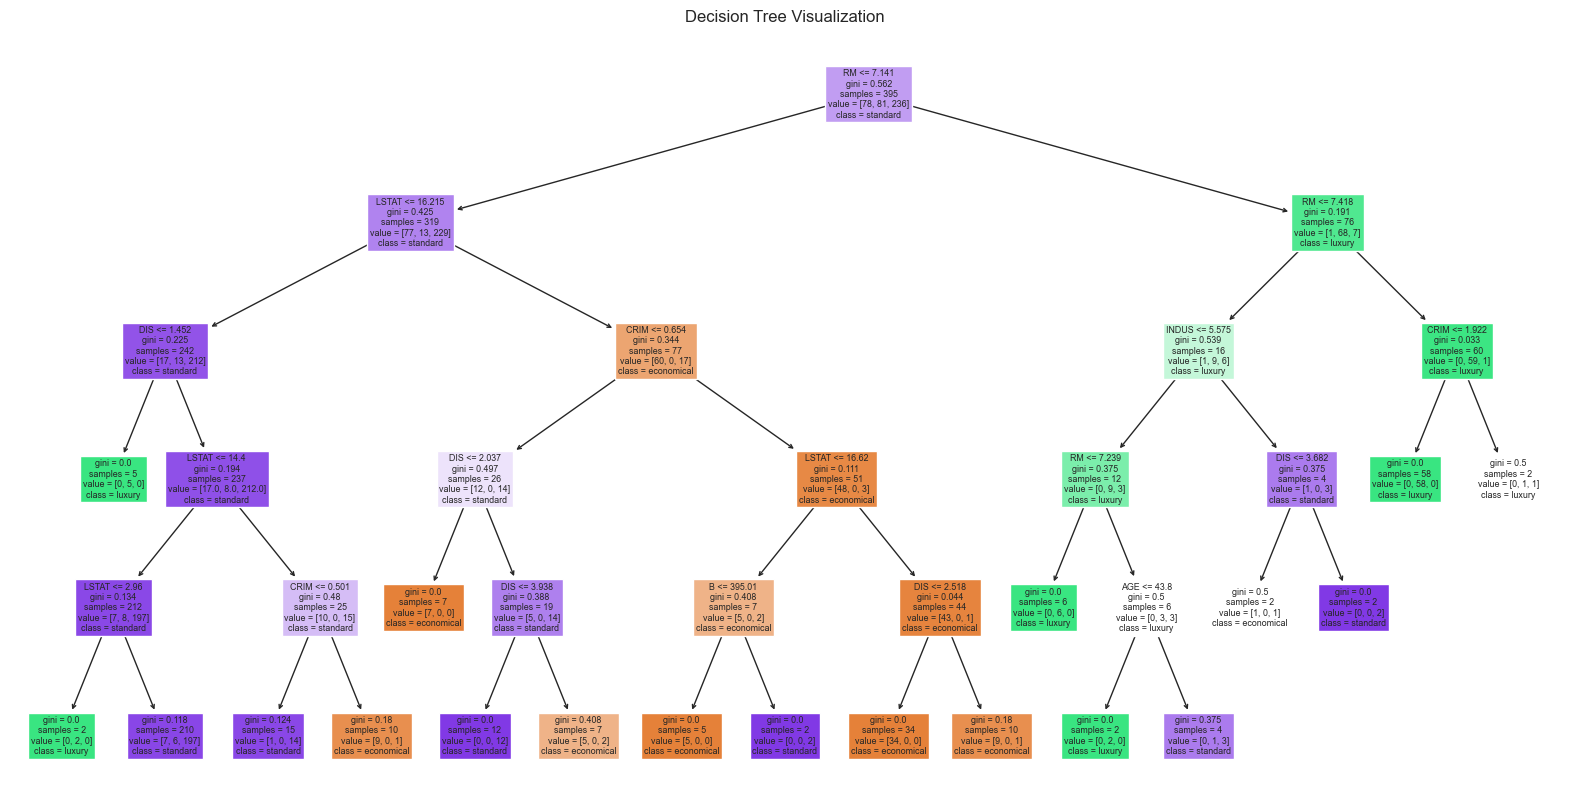

In [74]:
modelByHand = Classification(dfClassification.copy(), 'MEDV')
modelByHand.prepare_data()
modelByHand.set_knn_params(n_neighbors=5, weights='uniform')
modelByHand.set_decision_tree_params(max_depth=5, min_samples_split=4, min_samples_leaf=2)

#### <p align="justify"><font size="5" color="#d62b5b">Explain briefly how the function GridSearchCV works.</font></p>

<p align="justify">
GridSearchCV is a function provided by the library scikit-learn in Python, used to optimize the hyperparameters of a model. The process involves specifying a model (or multiple models), a grid of hyperparameter values, and a method for scoring model performance.
</p>

<p align="justify">
<b>Working of GridSearchCV:</b>
<ol>
<li><b>Parameter Grid Setup:</b> First, a parameter grid is defined that lists all the possible values for each hyperparameter of the model you wish to test. This can include anything from the number of trees in a random forest to learning rates or regularization parameters.</li>
<li><b>Cross-Validation:</b> GridSearchCV performs exhaustive search over the specified parameter grid. For each combination of parameters, it runs a cross-validation procedure to evaluate each model. The cross-validation procedure splits the input data into multiple sets, uses some for training, and some for testing to ensure the model’s performance is evaluated thoroughly.</li>
<li><b>Model Evaluation:</b> The performance of each model configuration is assessed using a scoring function, typically accuracy for classification tasks or mean squared error for regression tasks. This step is critical as it determines how effective each combination of parameters is at solving the problem.</li>
<li><b>Selecting the Best Model:</b> After evaluating all possible combinations, GridSearchCV selects the parameters that yield the best performance as measured by the scoring function. The model with these parameters is then considered to be the most optimal.</li>
</ol>
</p>

<p align="justify">
This process helps in automating the tuning of hyperparameters to find the best possible model for the data. The outcome is a model that is ideally suited to provide the highest accuracy, efficiency, or other metric as defined by the user.
</p>


In [75]:
knn_params = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']
}
knn_clf = model.train_knn(knn_params)

Best KNN Params: {'n_neighbors': 10, 'weights': 'uniform'}
Best KNN Score: 0.7670886075949367
KNN Test Score: 0.8080808080808081
KNN Classification Report:
               precision    recall  f1-score   support

  economical       0.83      0.65      0.73        23
      luxury       0.92      0.61      0.73        18
    standard       0.78      0.93      0.85        58

    accuracy                           0.81        99
   macro avg       0.84      0.73      0.77        99
weighted avg       0.82      0.81      0.80        99



Best Decision Tree Params: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best Decision Tree Score: 0.8886075949367088
Decision Tree Test Score: 0.8080808080808081
Decision Tree Classification Report:
               precision    recall  f1-score   support

  economical       0.60      0.78      0.68        23
      luxury       1.00      0.89      0.94        18
    standard       0.87      0.79      0.83        58

    accuracy                           0.81        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.83      0.81      0.81        99



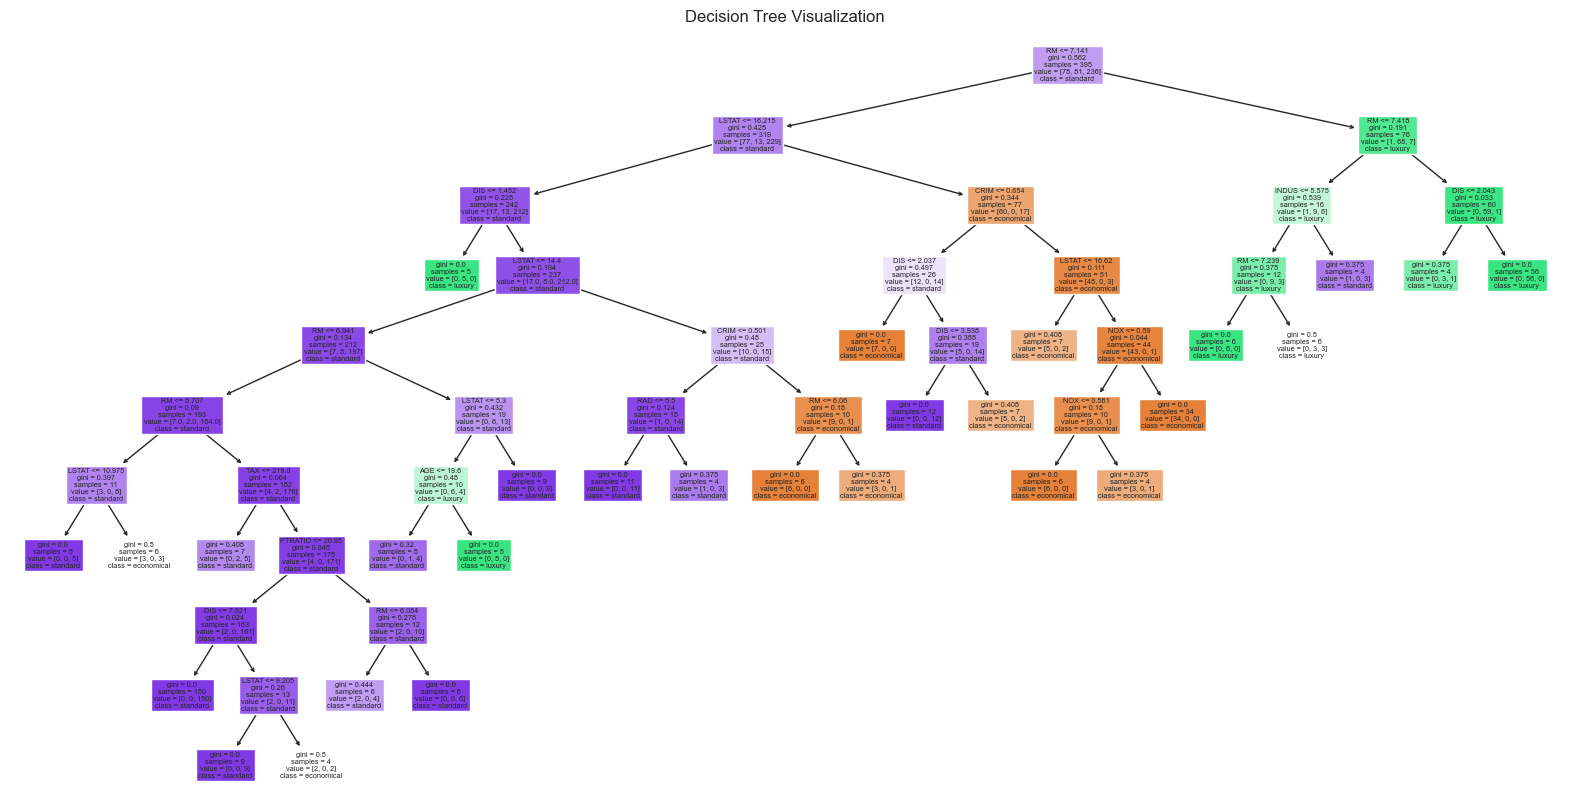

In [76]:
dt_params = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

dt_clf = model.train_decision_tree(dt_params)

#### <p align="justify"><font size="5" color="#d62b5b">Have underfitting or overfitting occurred in your models? Generally, when do these phenomena occur? Explain each.</font></p>

<p align="justify">
Based on the provided results for the Decision Tree model, there are signs of overfitting. Here's a detailed breakdown and interpretation:
</p>

<p align="justify">
<b>Performance Difference:</b> There is a noticeable difference between the training score (Best Decision Tree Score: 0.891) and the test score (Decision Tree Test Score: 0.808). While the difference isn't drastic, it is significant enough to suggest that the model performs better on the training data compared to unseen test data.
</p>

<p align="justify">
<b>Precision and Recall Analysis:</b>
<ul>
<li><b>Economical:</b> The recall is relatively high at 0.78, suggesting that the model is good at identifying this class, but the precision is lower at 0.60, indicating more false positives.</li>
<li><b>Luxury:</b> The precision is perfect at 1.00, meaning there were no false positives, and the recall is also high at 0.89, indicating good performance for this class.</li>
<li><b>Standard:</b> The precision and recall are somewhat balanced but not perfect (0.87 precision and 0.79 recall), indicating decent performance.</li>
</ul>
</p>

<p align="justify">
<b>Accuracy vs. Training Accuracy:</b> The accuracy on the test set is 0.81, which, when compared to the training accuracy (inferred from the best score of 0.891), shows a drop. This drop can be an indication of overfitting, where the model is tuned to perform exceptionally well on the training data but loses some of that performance when tested on new, unseen data.
</p>

<p align="justify">
<b>Conclusion:</b> The model seems to exhibit mild overfitting. While it performs fairly well, the drop in performance from training to testing and the detailed precision-recall values suggest it may be slightly over-tuned to the training data. This isn't uncommon in decision tree models, especially if they grow deep and complex. The decision tree might be capturing noise and details in the training data that do not generalize well to new data.
</p>

<p align="justify">
<b>Underfitting and Overfitting Explained:</b>
<ul>
<li><b>Underfitting:</b> This occurs when a model is too simple, characterized by low variability and high bias, to capture the underlying trend of the data. It typically results in poor performance on both training and testing data.</li>
<li><b>Overfitting:</b> This happens when a model is too complex, characterized by high variability and low bias, capturing noise along with the underlying trend. It usually shows high performance on training data but poor generalization to unseen test data.</li>
</ul>
</p>


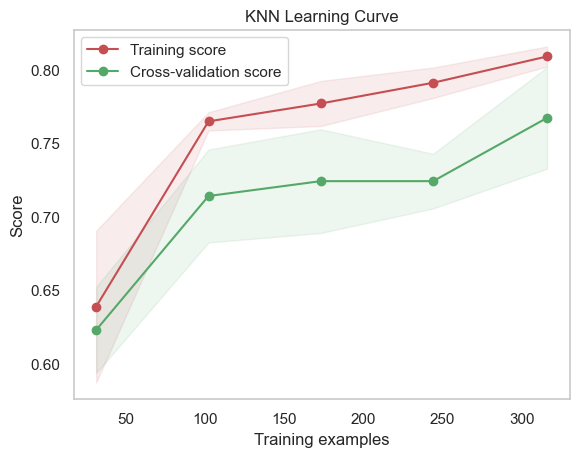

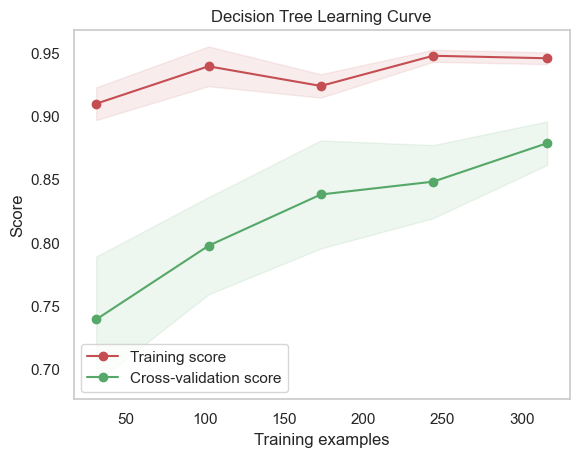

In [77]:
model.evaluate_learning_curve(knn_clf.best_estimator_, "KNN Learning Curve")
model.evaluate_learning_curve(dt_clf.best_estimator_, "Decision Tree Learning Curve")

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 6: Ensemble Methods</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">Explain the rationale for using Ensemble methods and why these methods are of high importance today.</font></p>

<p align="justify">
Ensemble methods in machine learning leverage the power of multiple models to achieve better predictive performance than could be obtained from any of the individual models making up the ensemble. The rationale behind using ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability and robustness over a single estimator.
</p>

<p align="justify">
<b>Key Reasons for Using Ensemble Methods:</b>
<ul>
<li><b>Accuracy:</b> Ensemble methods often achieve higher accuracy than single models. By aggregating the predictions of multiple models, they can often cancel out individual model errors, leading to more accurate predictions, especially on complex problems.</li>
<li><b>Robustness:</b> They reduce the risk of an unfortunate selection of a poor one-off learning model by averaging out biases and spreading the variance among multiple models.</li>
<li><b>Overfitting Reduction:</b> By combining multiple models, ensemble methods can lower the chance of fitting too much to the noise in the training data, a common problem in complex models.</li>
</ul>
</p>

<p align="justify">
<b>Types of Ensemble Methods:</b>
<ul>
<li><b>Bagging:</b> Helps in reducing the variance of a prediction model by creating multiple versions of the same training algorithm and then combining their predictions. Random Forest is a classic example of a bagging model.</li>
<li><b>Boosting:</b> Aims to improve the predictive flexibility of simple models by sequentially applying weak models to progressively more difficult data, and it often leads to dramatic improvements. Examples include AdaBoost and Gradient Boosting.</li>
<li><b>Stacking:</b> Involves training a new model to aggregate the predictions of several other models, typically to consolidate the predictions of several specialized models.</li>
</ul>
</p>

<p align="justify">
<b>Importance Today:</b> In today’s complex and data-driven world, ensemble methods are critically important due to their ability to provide more stable and accurate predictions. They are widely used in various real-world applications such as risk management, disease prediction, and customer segmentation, among others. Their ability to outperform single model predictions significantly contributes to their popularity in machine learning competitions like those on Kaggle.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">Explain the general mechanism of Boosting and Bagging methods for classification and describe their differences.</font></p>

<p align="justify">
Boosting and Bagging are both ensemble techniques in machine learning that utilize multiple models to produce better predictive performance than could be obtained from any single model alone. Despite sharing this common goal, they differ significantly in their approach and mechanism.
</p>

<p align="justify">
<b>Boosting:</b> 
<ul>
<li><b>Mechanism:</b> Boosting involves sequentially adding models to the ensemble where each subsequent model attempts to correct the errors made by the previous ones. The models are added sequentially based on the performance of predecessors and thus the learning is adaptive. The weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.</li>
<li><b>Use:</b> This method is used when we aim to decrease bias and build strong predictive models. Examples include AdaBoost and Gradient Boosting Machine (GBM).</li>
<li><b>Characteristics:</b> Boosting tends to improve accuracy but can be prone to overfitting if not properly tuned or if the data is overly noisy.</li>
</ul>
</p>

<p align="justify">
<b>Bagging:</b>
<ul>
<li><b>Mechanism:</b> Bagging, or Bootstrap Aggregating, involves training each model in the ensemble using a randomly drawn subset of the training set with replacement. Each model in the ensemble votes or averages to predict the output. The process is parallel, as each model is built independently.</li>
<li><b>Use:</b> This method is used to increase generalization by reducing variance in the predictions. Random Forest is a classic example of bagging.</li>
<li><b>Characteristics:</b> Bagging can effectively increase accuracy and reduce overfitting, particularly in complex models that tend to learn highly variable patterns from the training data.</li>
</ul>
</p>

<p align="justify">
<b>Differences:</b>
<ul>
<li><b>Error Reduction:</b> Boosting primarily aims to reduce bias (making a series of weak learners into a strong learner), whereas Bagging aims to reduce variance (ensuring that the model does not overfit the training data).</li>
<li><b>Model Building:</b> Boosting builds models sequentially, while Bagging builds them in parallel.</li>
<li><b>Focus on Errors:</b> Boosting changes the weighting of instances based on previous model errors, focusing more on difficult cases, whereas Bagging uses uniform weights for model averaging.</li>
</ul>
</p>

<p align="justify">
Understanding these mechanisms and differences can help in selecting the right approach based on the specific needs of a problem, particularly in terms of the balance between bias and variance.
</p>


<p align="justify"><font size="5" color="#A9CCE3"><b>Section 7: Random Forest</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">Explain briefly how the Random Forest method works, and also what is the concept of Bootstrapping in Random Forests? How does it function, and how does it affect the outcome of the model?</font></p>

<p align="justify">
The Random Forest method is a popular and versatile machine learning algorithm that falls under the category of ensemble techniques, specifically the bagging type. It is used for both regression and classification tasks and is favored for its robustness, simplicity, and excellent performance on many problems.
</p>

<p align="justify">
<b>How Random Forest Works:</b>
<ul>
<li><b>Creation of Multiple Decision Trees:</b> At its core, Random Forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each tree in the forest is built from a random sample of the training dataset.</li>
<li><b>Random Selection of Features:</b> When building these trees, each time a split in a tree is considered, a random subset of the features is chosen as split candidates from the full set of features. This adds to the diversity of the model, making it robust against overfitting.</li>
<li><b>Majority Voting or Averaging:</b> For classification tasks, the prediction by the random forest is the class that receives the majority of the votes from the individual trees. For regression tasks, it is typically the average or median of the predictions from all the trees.</li>
</ul>
</p>

<p align="justify">
<b>Concept of Bootstrapping:</b>
<ul>
<li><b>Sampling Technique:</b> Bootstrapping in Random Forests refers to the method of randomly selecting a subset of the data set with replacement to train each tree. Essentially, some samples may appear multiple times in the same subset, while others may not appear at all.</li>
<li><b>Impacts on the Model:</b> This bootstrapping process allows the trees to be somewhat de-correlated, which reduces the variance of the model without increasing the bias. In other words, it helps in building a model that generalizes well to new data, rather than memorizing the training data.</li>
<li><b>Out-of-Bag Error Estimation:</b> Random Forests also use the bootstrapping property to estimate the model’s performance. About one-third of the data is not used to train each tree. This unused data, known as the out-of-bag (OOB) data, can be used to validate the model. This is akin to having a test set that doesn't require a separate validation dataset.</li>
</ul>
</p>

<p align="justify">
In summary, Random Forest uses multiple decision trees trained on bootstrapped subsets of the data and combines their predictions. This method not only improves the predictive accuracy but also controls over-fitting through averaging or majority voting. The use of bootstrapping in Random Forests contributes significantly to its ability to deliver robust models that generalize well on unseen data.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">Does the number of decision trees in a Random Forest affect the model's performance? What is generally the best range for this number experimentally?</font></p>

<p align="justify">
The number of decision trees in a Random Forest is a crucial hyperparameter that directly influences the model's performance and accuracy. In Random Forest, each decision tree contributes its vote towards the final prediction, thus the ensemble's overall accuracy generally improves as more trees are added.
</p>

<p align="justify">
<b>Impact on Performance:</b>
<ul>
<li><b>Reduction of Variance:</b> Increasing the number of trees in a Random Forest generally leads to a reduction in the variance part of the model's error. This happens because the averaging of multiple independent predictions tends to cancel out errors from individual trees.</li>
<li><b>Overfitting:</b> Unlike many other machine learning algorithms, adding more trees to a Random Forest model typically does not result in overfitting. Since each tree is built on a different subset of data and features, the model's ability to generalize does not degrade even with a large number of trees.</li>
</ul>
</p>

<p align="justify">
<b>Optimal Range:</b>
<ul>
<li><b>Experimental Range:</b> While the specific optimal number of trees will depend on the dataset and specific problem, a common range considered is between 100 to 500 trees. This range is often a good starting point for achieving significant improvements in model accuracy without facing diminishing returns.</li>
<li><b>Computational Cost:</b> It's important to note that more trees mean a greater computational and memory overhead. The model becomes slower at training and predicting as the number of trees increases. Therefore, it's essential to balance accuracy with computational efficiency, especially for applications where prediction speed is critical.</li>
</ul>
</p>

<p align="justify">
In practice, it is advisable to use cross-validation or similar techniques to experiment with different numbers of trees to identify the most effective configuration for the specific problem at hand. Often, the performance gain plateaus beyond a certain number of trees, and identifying this point can prevent unnecessary computational expenses.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">When is using Random Forest not suitable? When is it recommended to use this method? Also, what effect does using Random Forest have on variance?</font></p>

<p align="justify">
Random Forest is a versatile machine learning method suitable for a variety of classification and regression tasks. However, like any method, it has scenarios where it is less effective, as well as situations where it is particularly beneficial.
</p>

<p align="justify">
<b>When Not Suitable:</b>
<ul>
<li><b>High-Dimensional Sparse Data:</b> Random Forest can perform poorly with very high-dimensional data, such as text data or images, where the data is mostly zeros (sparse). In these cases, models like Support Vector Machines or deep learning tend to be more effective.</li>
<li><b>Real-time Predictions:</b> Due to the ensemble nature requiring multiple decision trees to vote on outcomes, Random Forest can be slow for applications needing real-time predictions, especially with a large number of trees.</li>
<li><b>Small Data Sets:</b> While Random Forest can handle small datasets, the benefit of its ensemble approach diminishes when there isn’t enough data to ensure diversity among the trees, potentially leading to overfitting.</li>
</ul>
</p>

<p align="justify">
<b>When Recommended:</b>
<ul>
<li><b>Large and Complex Datasets:</b> Random Forest performs very well with large datasets, capturing complex interactions between features without requiring feature scaling or extensive data preparation.</li>
<li><b>Multi-Class Problems:</b> This method is well-suited for multi-class output problems due to its capability to handle multiple decision paths efficiently.</li>
<li><b>Feature Importance Evaluation:</b> Random Forest is beneficial when an understanding of feature importance in predictions is required, as it provides straightforward metrics to evaluate the impact of each feature.</li>
</ul>
</p>

<p align="justify">
<b>Effect on Variance:</b>
<ul>
<li><b>Variance Reduction:</b> Random Forest typically reduces variance compared to individual decision trees by averaging multiple predictions, which tends to cancel out errors. As a result, it is less likely to overfit than a single decision tree, especially with a well-chosen number of trees in the forest.</li>
</ul>
</p>

<p align="justify">
In summary, Random Forest is recommended for most non-time-sensitive tasks where the model can afford some computational time for training and predictions. It is especially advantageous when dealing with non-linear problems with interactions between variables or when a robust generalization is necessary.
</p>


In [78]:
class RandomForest:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
        self.data[self.target_column] = pd.to_numeric(self.data[self.target_column], errors='coerce')
        self.data = self.data.dropna(subset=[self.target_column])

        categorized_target = self.categorize_target(self.data[self.target_column])
        self.data[self.target_column] = categorized_target.astype('category')

        if self.data[self.target_column].dtype == 'object':
            le = LabelEncoder()
            self.data[self.target_column] = le.fit_transform(self.data[self.target_column])

        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def categorize_target(self, target):
        bins = target.quantile([0, 0.2, 0.8, 1])
        labels = ['economical', 'standard', 'luxury']
        categorized_target = pd.cut(target, bins=bins, labels=labels, include_lowest=True)
        return categorized_target

    def train_random_forest(self, params, show = True):
        rf = RandomForestClassifier()
        clf = GridSearchCV(rf, params, cv=5)
        clf.fit(self.X_train, self.y_train)
        if(show):
            print("Best RandomForest Params:", clf.best_params_)
            print("Best RandomForest Score:", clf.best_score_)
            print("RandomForest Test Score:", clf.score(self.X_test, self.y_test))
            print("RandomForest Classification Report:\n", classification_report(self.y_test, clf.predict(self.X_test)))
        return clf

    def plot_tree_from_forest(self, tree_index=0):
            plt.figure(figsize=(20, 10))
            plot_tree(self.clf.best_estimator_.estimators_[tree_index], filled=True, 
                    feature_names=self.data.columns.drop(self.target_column), 
                    class_names=np.unique(self.y_train).astype(str))
            plt.title(f"Visualization of Tree {tree_index} in the Random Forest")
            plt.show()

    def evaluate_parameters(self, n_estimators_list, max_depth_list):
        results = {}
        for n_estimators in n_estimators_list:
            for max_depth in max_depth_list:
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
                rf.fit(self.X_train, self.y_train)
                score = rf.score(self.X_test, self.y_test)
                results[(n_estimators, max_depth)] = score
        self.results = results

    def plot_evaluation_results(self, n_estimators_list, max_depth_list):
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        line_styles = ['-', '--', '-.', ':']
        color_index = 0
        
        for idx, n_estimators in enumerate(n_estimators_list):
            accuracies = [self.results[(n_estimators, max_depth)] for max_depth in max_depth_list]
            ax.plot(max_depth_list, accuracies, label=f'Estimators = {n_estimators}',
                    color=colors[color_index % len(colors)],
                    linestyle=line_styles[idx % len(line_styles)])
            color_index += 1

        ax.set_xlabel('Maximum Depth')
        ax.set_ylabel('Accuracy')
        ax.set_title('Random Forest Performance Evaluation by Max Depth')
        ax.legend()
        ax.grid(True)
        plt.show()


dfClassification = pd.read_excel('DataSet.xlsx')
preprocessor = DataPreprocessor(dfClassification)
preprocessor.predictive_imputation()

model = RandomForest(dfClassification.copy(), 'MEDV')
model.prepare_data()

In [79]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model.train_random_forest(params)

Best RandomForest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest Score: 0.9012658227848102
RandomForest Test Score: 0.8686868686868687
RandomForest Classification Report:
               precision    recall  f1-score   support

  economical       0.79      0.65      0.71        23
      luxury       1.00      0.94      0.97        18
    standard       0.86      0.93      0.89        58

    accuracy                           0.87        99
   macro avg       0.88      0.84      0.86        99
weighted avg       0.87      0.87      0.87        99



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

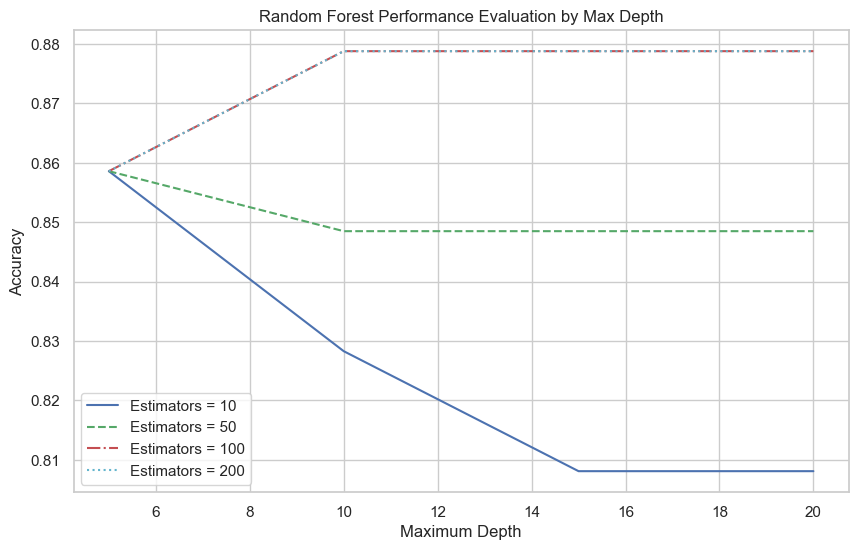

In [80]:
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [5, 10, 15, 20]
model.evaluate_parameters(n_estimators_list, max_depth_list)
model.plot_evaluation_results(n_estimators_list, max_depth_list)

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 8 (Bonus): XGBoost</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">Briefly explain how XGBoost works.</font></p>

<p align="justify">
XGBoost, which stands for eXtreme Gradient Boosting, is an advanced implementation of the gradient boosting algorithm. This machine learning algorithm is renowned for its performance and speed in classification, regression, and ranking tasks. Here's a brief look at how XGBoost operates:
</p>

<p align="justify">
<b>Ensemble Learning:</b> XGBoost is an ensemble technique that builds upon the concept of boosting, where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.
</p>

<p align="justify">
<b>Gradient Boosting Framework:</b> At its core, XGBoost uses a gradient boosting framework. Trees are added one at a time, and existing trees in the model are not changed. Each new tree is fit on a modified version of the original dataset to correct for errors made by the previously trained tree. The model predictions are an aggregation of the predictions made by previous trees.
</p>

<p align="justify">
<b>Regularization:</b> One of the key features that distinguishes XGBoost is the use of a regularization term in the objective function, which helps to control over-fitting. This makes it more robust than standard gradient boosting.
</p>

<p align="justify">
<b>Handling Missing Values:</b> XGBoost has an in-built routine to handle missing values. When XGBoost encounters a missing value on a feature, it automatically learns the direction to assign it to minimize the objective function.
</p>

<p align="justify">
<b>Tree Pruning:</b> The tree pruning in XGBoost is depth-wise, meaning it starts pruning the branches of the trees once a maximum depth is reached, in contrast to level-wise pruning seen in many other implementations.
</p>

<p align="justify">
<b>System Optimization:</b> XGBoost is designed for efficiency of compute time and memory resources. It uses advanced techniques in computer science, including hardware optimization (such as cache awareness) and software design (such as parallel processing and distributed computing) to speed up processing.
</p>

<p align="justify">
<b>Scalability:</b> It is designed to be highly scalable in all scenarios and is capable of handling large-scale data across multiple cores and even distributed systems.
</p>

<p align="justify">
These features make XGBoost a powerful tool for machine learning competitions and practical applications where predictive accuracy is a priority.
</p>


#### <p align="justify"><font size="5" color="#d62b5b">First, explain the concept of Gradient Boosting, and then describe the difference between Boosting Tree and Decision Tree.</font></p>

<p align="justify">
Gradient Boosting is a powerful machine learning technique that builds on decision trees in a sequential manner. This approach leverages the concept of boosting, where weak learners (typically decision trees) are combined to create a strong overall model. The key idea behind gradient boosting is to successively add predictors to an ensemble, each one correcting its predecessor. This is achieved by fitting the new predictor to the residual errors made by the previous predictors.
</p>

<p align="justify">
In each stage, a new tree is fit on the residuals (the differences between observed and predicted values) from the earlier trees. Essentially, each new tree attempts to minimize the errors left by the previous ones in a gradient descent like fashion, where the 'gradient' is defined by the loss function of the model (e.g., mean squared error for regression tasks).
</p>

<p align="justify">
<b>Differences between Boosting Tree and Decision Tree:</b>
</p>

<p align="justify">
<b>1. Composition:</b> A decision tree is a single tree that is typically pruned to prevent overfitting. In contrast, a boosting tree model consists of multiple trees where each tree builds on the previous ones to improve accuracy.
</p>

<p align="justify">
<b>2. Function:</b> Decision trees split the data into homogeneous sets. This is useful for interpretation but can be susceptible to noise. Boosting trees, however, focus on reducing bias and variance by combining multiple trees, especially focusing on areas where the previous trees performed poorly.
</p>

<p align="justify">
<b>3. Predictive Performance:</b> Typically, a single decision tree will not perform as well on complex datasets due to its simplicity. Boosting trees are generally more accurate because they aggregate the outcomes of many models for better performance and complexity handling.
</p>

<p align="justify">
<b>4. Robustness:</b> Decision trees can be sensitive to small changes in the data, leading to different splits and therefore different trees. Boosting trees are more stable in this regard, as new trees are added to correct previous errors rather than depending solely on the existing tree structure.
</p>

<p align="justify">
<b>5. Training Process:</b> Training a decision tree involves selecting the best splits based on purity scores like Gini or entropy, whereas training a boosting tree model involves fitting trees to the residuals of the loss function, focusing on areas of greatest error.
</p>

<p align="justify">
Overall, while decision trees are easy to interpret, boosting trees offer a more flexible and robust approach for dealing with complex datasets, thereby improving predictive accuracy substantially over individual decision trees.
</p>


Algorithm:
Input: training set $\{(x_i, y_i)\}_{i = 1}^{n}$, a differentiable loss function $L(y, F(x))$, a numberr of iterations $M$.

1. Initize model with a constant value:
$$
F_0(x) = argmin_{\gamma} \sum_{i = 1}^{n} L(y_i, \gamma)
$$
2. For $m = 0$ to $M$:
    1. Compute so-called pseudo-residuals:
    $$
        r_{im} = - \left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m - 1}(x)} \qquad \text{for} \space i = 1, \dots, n
    $$
    2. Fit a base learner(or week learner, e.g. tree) closed under scaling $h_m(x)$  to psedudo-residuals.
    3. Compute multiplier $\gamma_m$ by solving the folling one-dimensional optimization problem:
    $$
    \gamma_m = argmin_{\gamma} \sum_{i=1}^{n} L(y_i, F_{m - 1}(x_i) + \gamma h_m(x_i)).
    $$
    4. Update the model:
    $$
        F_m(x) = F_{m - 1}(x) + \gamma_m h_m(x).
    $$
3. Output $F_M(x).$

In [81]:
class XGBoost:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
        self.data[self.target_column] = pd.to_numeric(self.data[self.target_column], errors='coerce')
        self.data = self.data.dropna(subset=[self.target_column])

        categorized_target = self.categorize_target(self.data[self.target_column])
        self.data[self.target_column] = categorized_target.astype('category')

        if self.data[self.target_column].dtype == 'object' or self.data[self.target_column].dtype.name == 'category':
            le = LabelEncoder()
            self.data[self.target_column] = le.fit_transform(self.data[self.target_column])

        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def categorize_target(self, target):
        bins = target.quantile([0, 0.2, 0.8, 1])
        labels = ['economical', 'standard', 'luxury']
        categorized_target = pd.cut(target, bins=bins, labels=labels, include_lowest=True)
        return categorized_target

    def train_xgboost(self, params, show = True):
        xgb_model = xgb.XGBClassifier(objective='multi:softprob', eval_metric="mlogloss")
        clf = GridSearchCV(xgb_model, params, cv=5)
        clf.fit(self.X_train, self.y_train)
        if(show):
            print("Best XGBoost Params:", clf.best_params_)
            print("Best XGBoost Score:", clf.best_score_)
            print("XGBoost Test Score:", clf.score(self.X_test, self.y_test))
            print("XGBoost Classification Report:\n", classification_report(self.y_test, clf.predict(self.X_test)))
        return clf

    def evaluate_parameters(self, params):
        results = {}
        for max_depth in params['max_depth']:
            for n_estimators in params['n_estimators']:
                model = xgb.XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=0.1,
                                          objective='multi:softprob', eval_metric="mlogloss")
                model.fit(self.X_train, self.y_train)
                score = model.score(self.X_test, self.y_test)
                results[(n_estimators, max_depth)] = score
        self.results = results

    def plot_evaluation_results(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        line_styles = ['-', '--', '-.', ':']
        color_index = 0
        
        n_estimators_list = sorted(set(key[0] for key in self.results.keys()))
        max_depth_list = sorted(set(key[1] for key in self.results.keys()))

        for idx, n_estimators in enumerate(n_estimators_list):
            accuracies = [self.results[(n_estimators, max_depth)] for max_depth in max_depth_list]
            ax.plot(max_depth_list, accuracies, label=f'Estimators = {n_estimators}',
                    color=colors[color_index % len(colors)],
                    linestyle=line_styles[idx % len(line_styles)])
            color_index += 1

        ax.set_xlabel('Maximum Depth')
        ax.set_ylabel('Accuracy')
        ax.set_title('XGBoost Performance Evaluation by Max Depth')
        ax.legend()
        ax.grid(True)
        plt.show()

dfClassification = pd.read_excel('DataSet.xlsx')
preprocessor = DataPreprocessor(dfClassification)
preprocessor.predictive_imputation()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.900000,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.900000,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.830000,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,406.178949,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.900000,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.990000,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.900000,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.900000,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.450000,6.48,22.0


In [82]:
model = XGBoost(dfClassification.copy(), 'MEDV')
model.prepare_data()
model.train_xgboost({
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
})

Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Score: 0.9037974683544304
XGBoost Test Score: 0.8383838383838383
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65        23
           1       1.00      0.94      0.97        18
           2       0.84      0.90      0.87        58

    accuracy                           0.84        99
   macro avg       0.85      0.82      0.83        99
weighted avg       0.84      0.84      0.84        99



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

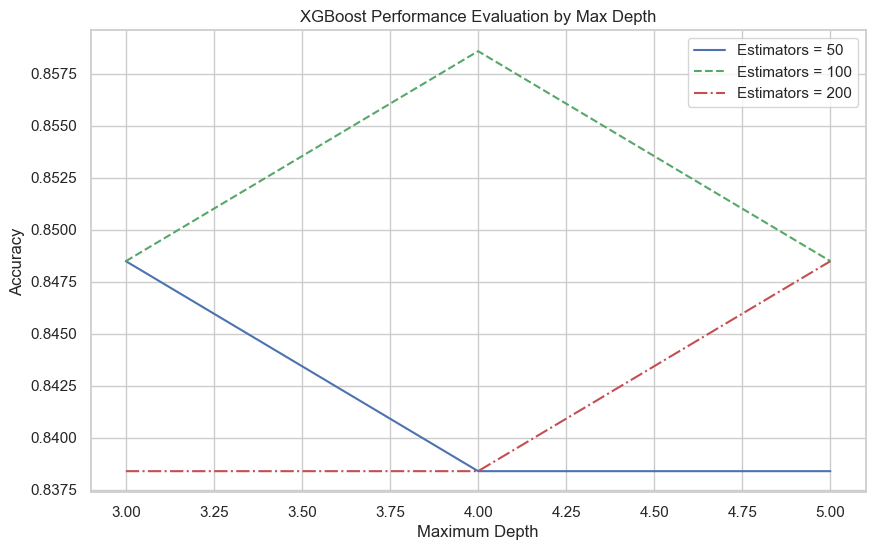

In [83]:
model.evaluate_parameters({
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
})
model.plot_evaluation_results()

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 9: Support Vector Machine</b></font><br></p>

In [84]:
class SupportVectorMachine:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self):
        self.data[self.target_column] = pd.to_numeric(self.data[self.target_column], errors='coerce')
        self.data = self.data.dropna(subset=[self.target_column])

        categorized_target = self.categorize_target(self.data[self.target_column])
        self.data[self.target_column] = categorized_target.astype('category')

        if self.data[self.target_column].dtype == 'object':
            le = LabelEncoder()
            self.data[self.target_column] = le.fit_transform(self.data[self.target_column])

        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def categorize_target(self, target):
        bins = target.quantile([0, 0.2, 0.8, 1])
        labels = ['economical', 'standard', 'luxury']
        categorized_target = pd.cut(target, bins=bins, labels=labels, include_lowest=True)
        return categorized_target

    def train_svm(self, params, search_method='grid', kernel='rbf', show = True):
        svm = SVC(kernel=kernel)
        if search_method == 'grid':
            clf = GridSearchCV(svm, params, cv=5)
        else:
            clf = RandomizedSearchCV(svm, params, cv=5, n_iter=10, random_state=42)
        clf.fit(self.X_train, self.y_train)
        if(show):
            print(f"Best SVM Params ({kernel} kernel, {search_method} search):", clf.best_params_)
            print(f"Best SVM Score ({kernel} kernel, {search_method} search):", clf.best_score_)
            print(f"SVM Test Score ({kernel} kernel, {search_method} search):", clf.score(self.X_test, self.y_test))
            print(f"SVM Classification Report ({kernel} kernel, {search_method} search):\n", classification_report(self.y_test, clf.predict(self.X_test)))
        return clf

    def evaluate_parameters(self, params, kernel='rbf'):
        results = {}
        svm = SVC(kernel=kernel)
        clf = GridSearchCV(svm, params, cv=5)
        clf.fit(self.X_train, self.y_train)
        
        for param, mean_test_score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
            C = param['C']
            gamma = param['gamma'] if 'gamma' in param else 'scale'
            results[(C, gamma)] = mean_test_score

        self.results = results

    def plot_evaluation_results(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        Cs = sorted(set(key[0] for key in self.results.keys()))
        gammas = sorted(set(key[1] for key in self.results.keys()))
        scores = np.array([[self.results[(C, gamma)] for gamma in gammas] for C in Cs])
        
        for idx, gamma in enumerate(gammas):
            ax.plot(Cs, scores[:, idx], label=f'gamma = {gamma}')
        
        ax.set_xlabel('C (Regularization Parameter)')
        ax.set_ylabel('Accuracy')
        ax.set_title('SVM Performance Evaluation by C and Gamma')
        ax.legend()
        ax.set_xscale('log')
        ax.grid(True)
        plt.show()

dfClassification = pd.read_excel('DataSet.xlsx')
preprocessor = DataPreprocessor(dfClassification)
preprocessor.predictive_imputation()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.900000,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.900000,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.830000,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,406.178949,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.900000,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.990000,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.900000,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.900000,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.450000,6.48,22.0


In [85]:
model = SupportVectorMachine(dfClassification.copy(), 'MEDV')
model.prepare_data()
grid_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
random_params = {
    'C': np.logspace(-2, 2, 10),
    'gamma': np.logspace(-9, 3, 10)
}
model.train_svm(grid_params, search_method='grid', kernel='rbf')
model.train_svm(random_params, search_method='random', kernel='linear')

Best SVM Params (rbf kernel, grid search): {'C': 10, 'gamma': 'scale'}
Best SVM Score (rbf kernel, grid search): 0.739240506329114
SVM Test Score (rbf kernel, grid search): 0.7171717171717171
SVM Classification Report (rbf kernel, grid search):
               precision    recall  f1-score   support

  economical       0.75      0.26      0.39        23
      luxury       1.00      0.50      0.67        18
    standard       0.68      0.97      0.80        58

    accuracy                           0.72        99
   macro avg       0.81      0.58      0.62        99
weighted avg       0.76      0.72      0.68        99

Best SVM Params (linear kernel, random search): {'gamma': 1e-05, 'C': 1.6681005372000592}
Best SVM Score (linear kernel, random search): 0.8708860759493671
SVM Test Score (linear kernel, random search): 0.8181818181818182
SVM Classification Report (linear kernel, random search):
               precision    recall  f1-score   support

  economical       0.72      0.57    

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                                        'gamma': array([1.00000000e-09, 2.15443469e-08, 4.64158883e-07, 1.00000000e-05,
       2.15443469e-04, 4.64158883e-03, 1.00000000e-01, 2.15443469e+00,
       4.64158883e+01, 1.00000000e+03])},
                   random_state=42)

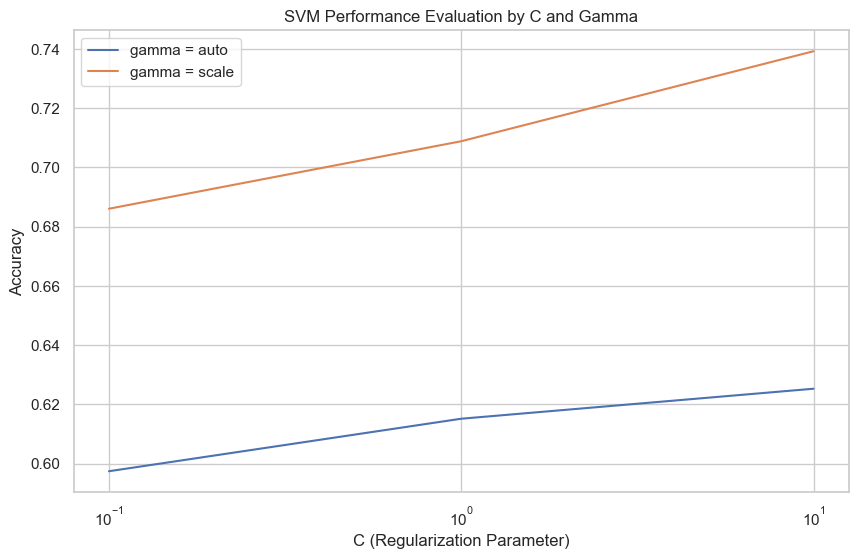

In [86]:
grid_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
model.evaluate_parameters(grid_params, kernel='rbf')
model.plot_evaluation_results()

#### <p align="justify"><font size="5" color="#d62b5b">Which one of the methods Grid search and Random search is better to use here?</font></p>

<p align="justify">
The choice between Grid Search and Random Search for hyperparameter tuning depends largely on the constraints and specifics of the project, such as computational resources, time availability, and the dimensionality of the parameter space.
</p>

<p align="justify">
<b>Grid Search:</b> This method systematically works through multiple combinations of parameter options, providing a comprehensive exploration of the parameter space. It guarantees that you will find the optimal combination of parameters that yields the best model performance, assuming the range and granularity of the parameters are appropriately set. However, this can be computationally expensive and time-consuming, particularly when dealing with a large number of hyperparameters or when the parameters can take on a wide range of values.
</p>

<p align="justify">
<b>Random Search:</b> In contrast, Random Search selects random combinations to try, which reduces the computational burden and tends to find a good enough set of parameters much faster than Grid Search. This method can be particularly useful when some hyperparameters do not significantly impact the performance, as it avoids exhaustively searching through all combinations and focuses on sampling a specified number of random configurations from the parameter space.
</p>

<p align="justify">
For hyperparameter tuning in SVM, the best approach would depend on the specific circumstances of your project:
</p>

<p align="justify">
- If the number of hyperparameters is small and you have sufficient computational resources and time, <b>Grid Search</b> might be preferable because of its thoroughness.
</p>

<p align="justify">
- If the hyperparameter space is large or if computational resources and time are limited, <b>Random Search</b> could be a more efficient and pragmatic choice. It allows for a faster convergence to a good solution without the need to exhaustively search all possible parameter combinations.
</p>

<p align="justify">
Ultimately, the decision between Grid Search and Random Search should be tailored to the context of your task, the size of your dataset, the nature of the model, and available computational resources.
</p>


<p align="justify"><font size="5" color="#A9CCE3"><b>Section 10: Analyzing Our Results And Model Evaluation</b></font><br></p>

#### <p align="justify"><font size="5" color="#d62b5b">Analyzing Our Results And Model Evaluation</font></p>

<p align="justify">
Evaluating the performance of our machine learning models is crucial for understanding their effectiveness and identifying areas for improvement. In this project, we employed a comprehensive set of evaluation metrics to analyze the results of our models thoroughly. Below is an explanation of each metric used and its importance in our analysis:
</p>

<ul>
<li><b>Confusion Matrix:</b> This is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows us to visualize the classifier’s performance by showing the true positives, false positives, true negatives, and false negatives, thus providing insight into the types of errors made by the model.</li>

<li><b>Accuracy:</b> This metric measures the proportion of the total number of predictions that were correct. It is a useful indicator of overall performance when the classes are balanced but can be misleading when class imbalances exist.</li>

<li><b>Precision:</b> Precision measures the accuracy of positive predictions. Formulated as the ratio of true positives to the sum of true and false positives, it is crucial when the cost of a false positive is high.</li>

<li><b>Recall (Sensitivity):</b> This metric measures the model's ability to detect positive samples. The higher the recall, the more complete the results, making it especially important when the cost of missing a positive (false negative) is significant.</li>

<li><b>F1-Score:</b> The F1-Score is the harmonic mean of precision and recall. It is a better measure of the incorrectly classified cases than the Accuracy metric, especially in cases of an uneven class distribution.</li>

<li><b>Macro Average:</b> This averages the precision, recall, and F1-score for each class but does not take class imbalance into account. It treats all classes equally, regardless of their support in the dataset.</li>

<li><b>Micro Average:</b> Micro average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, it is a useful measure when you want to weigh each instance or prediction equally.</li>

<li><b>Weighted Average:</b> This takes into account the support (the number of true instances for each class) while calculating the average, hence giving a better measure of the true performance of a model on an imbalanced dataset by weighting the score of each class by its prevalence.</li>
</ul>

<p align="justify">
By using these metrics, we can gain a detailed understanding of our model's performance across different aspects and dimensions. This comprehensive evaluation helps in identifying strengths and weaknesses, thereby guiding future improvements to the model.
</p>


Preprocessing: Remove Missing, Model: KNN
Classification Report:
              precision  recall  f1-score  support
economical         0.69    0.47      0.56    19.00
luxury             0.38    0.30      0.33    10.00
standard           0.71    0.82      0.76    50.00
accuracy           0.67    0.67      0.67     0.67
macro avg          0.59    0.53      0.55    79.00
weighted avg       0.66    0.67      0.66    79.00
Accuracy: 0.6708860759493671
Confusion Matrix:


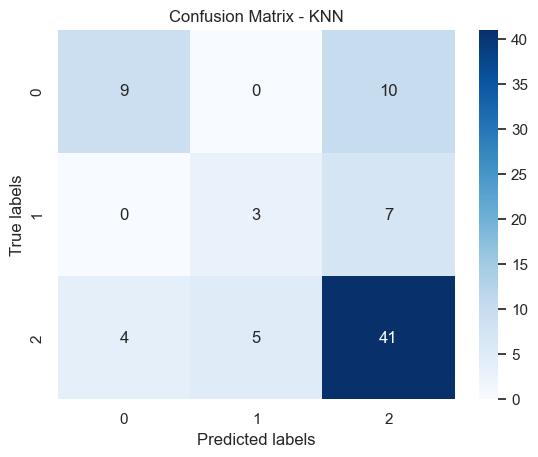

Preprocessing: Remove Missing, Model: Decision Tree
Classification Report:
              precision  recall  f1-score  support
economical         0.68    0.68      0.68    19.00
luxury             1.00    0.60      0.75    10.00
standard           0.83    0.90      0.87    50.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.84    0.73      0.77    79.00
weighted avg       0.82    0.81      0.81    79.00
Accuracy: 0.810126582278481
Confusion Matrix:


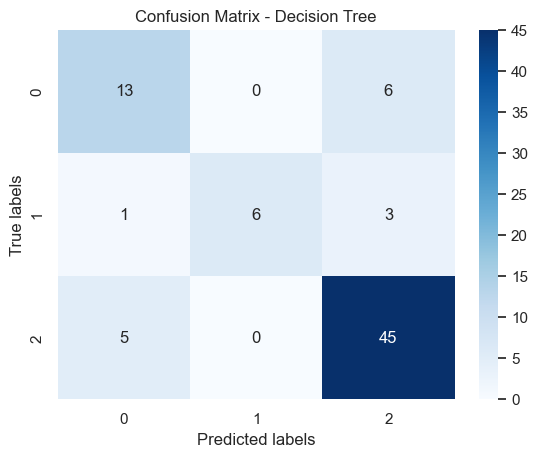

Preprocessing: Impute Mean, Model: KNN
Classification Report:
              precision  recall  f1-score  support
economical         0.67    0.67      0.67     21.0
luxury             0.83    0.67      0.74     15.0
standard           0.84    0.88      0.86     66.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.78    0.74      0.76    102.0
weighted avg       0.80    0.80      0.80    102.0
Accuracy: 0.803921568627451
Confusion Matrix:


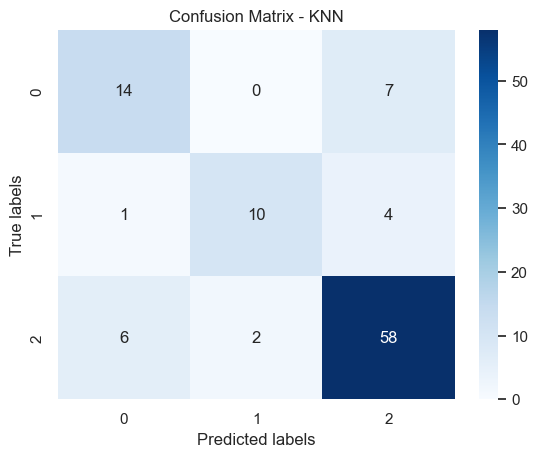

Preprocessing: Impute Mean, Model: Decision Tree
Classification Report:
              precision  recall  f1-score  support
economical         0.68    0.81      0.74    21.00
luxury             0.69    0.60      0.64    15.00
standard           0.84    0.82      0.83    66.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.74    0.74      0.74   102.00
weighted avg       0.79    0.78      0.78   102.00
Accuracy: 0.7843137254901961
Confusion Matrix:


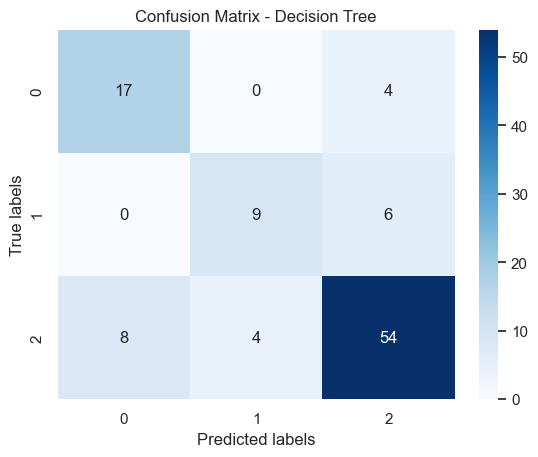

Preprocessing: Impute Median, Model: KNN
Classification Report:
              precision  recall  f1-score  support
economical         0.73    0.76      0.74    21.00
luxury             0.77    0.67      0.71    15.00
standard           0.87    0.88      0.87    66.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.79    0.77      0.78   102.00
weighted avg       0.82    0.82      0.82   102.00
Accuracy: 0.8235294117647058
Confusion Matrix:


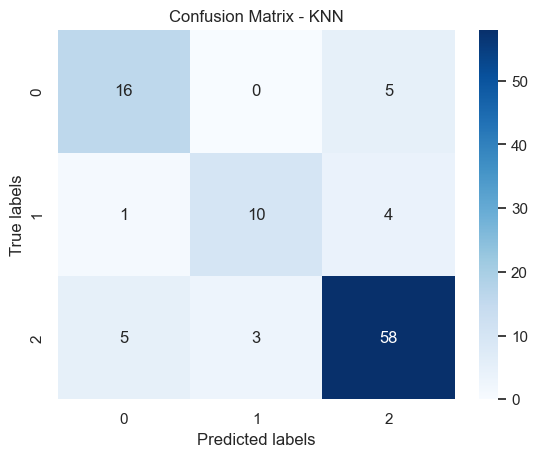

Preprocessing: Impute Median, Model: Decision Tree
Classification Report:
              precision  recall  f1-score  support
economical         0.77    0.81      0.79    21.00
luxury             0.71    0.67      0.69    15.00
standard           0.86    0.86      0.86    66.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.78    0.78      0.78   102.00
weighted avg       0.82    0.82      0.82   102.00
Accuracy: 0.8235294117647058
Confusion Matrix:


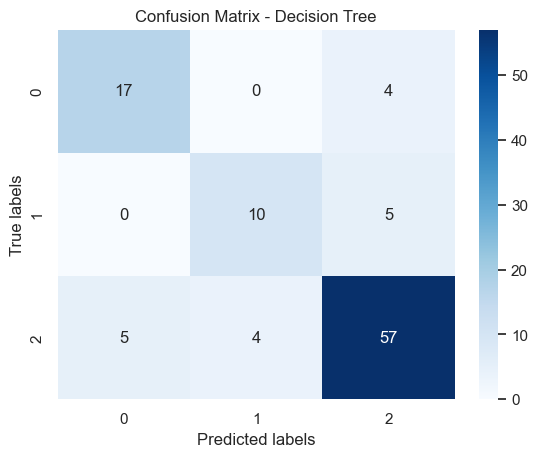

Preprocessing: Predictive Imputation, Model: KNN
Classification Report:
              precision  recall  f1-score  support
economical         0.83    0.65      0.73    23.00
luxury             0.92    0.61      0.73    18.00
standard           0.78    0.93      0.85    58.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.84    0.73      0.77    99.00
weighted avg       0.82    0.81      0.80    99.00
Accuracy: 0.8080808080808081
Confusion Matrix:


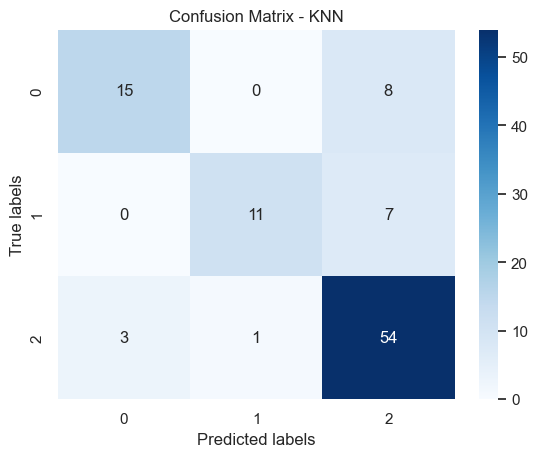

Preprocessing: Predictive Imputation, Model: Decision Tree
Classification Report:
              precision  recall  f1-score  support
economical         0.62    0.78      0.69    23.00
luxury             1.00    0.89      0.94    18.00
standard           0.87    0.81      0.84    58.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.83    0.83      0.82    99.00
weighted avg       0.84    0.82      0.82    99.00
Accuracy: 0.8181818181818182
Confusion Matrix:


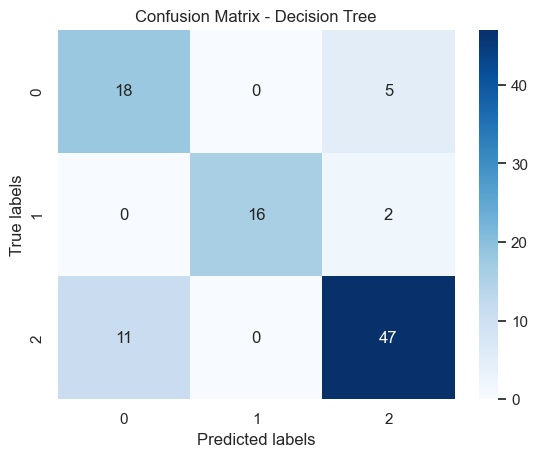

In [87]:
def evaluate_preprocessing_methods(data_file, target_column):
    df = pd.read_excel(data_file)

    preprocessors = [
        ('Remove Missing', lambda x: x.remove_missing_values()),
        ('Impute Mean', lambda x: x.impute_mean_median_mode('mean')),
        ('Impute Median', lambda x: x.impute_mean_median_mode('median')),
        ('Predictive Imputation', lambda x: x.predictive_imputation())
    ]

    results = []

    for method_name, preprocessor_function in preprocessors:
        preprocessor = DataPreprocessor(df.copy())
        processed_data = preprocessor_function(preprocessor)

        model = Classification(processed_data.copy(), target_column)
        model.prepare_data()

        knn_params = {
            'n_neighbors': range(1, 20),
            'weights': ['uniform', 'distance']
        }

        dt_params = {
            'max_depth': range(1, 20),
            'min_samples_split': range(2, 10),
            'min_samples_leaf': range(1, 5)
        }

        knn_clf = model.train_knn(knn_params, False)
        dt_clf = model.train_decision_tree(dt_params, False)

        for clf, clf_name in [(knn_clf, 'KNN'), (dt_clf, 'Decision Tree')]:
            y_pred = clf.predict(model.X_test)
            cm = confusion_matrix(model.y_test, y_pred)
            report = classification_report(model.y_test, y_pred, output_dict=True)
            accuracy = accuracy_score(model.y_test, y_pred)

            results.append({
                'Preprocessing': method_name,
                'Model': clf_name,
                'Confusion Matrix': cm,
                'Report': report,
                'Accuracy': accuracy
            })

    for result in results:
        print(f"Preprocessing: {result['Preprocessing']}, Model: {result['Model']}")
        print("Classification Report:")
        print(pd.DataFrame(result['Report']).transpose().round(2))
        print("Accuracy:", result['Accuracy'])
        print("Confusion Matrix:")
        fig, ax = plt.subplots()
        sns.heatmap(result['Confusion Matrix'], annot=True, ax=ax, cmap='Blues', fmt='g')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {result["Model"]}')
        plt.show()

evaluate_preprocessing_methods('DataSet.xlsx', 'MEDV')

Preprocessing: Remove Missing, Model: Random Forest
Classification Report:
              precision  recall  f1-score  support
economical         0.86    0.63      0.73    19.00
luxury             1.00    0.90      0.95    10.00
standard           0.88    0.98      0.92    50.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.91    0.84      0.87    79.00
weighted avg       0.89    0.89      0.88    79.00
Accuracy: 0.8860759493670886
Confusion Matrix:


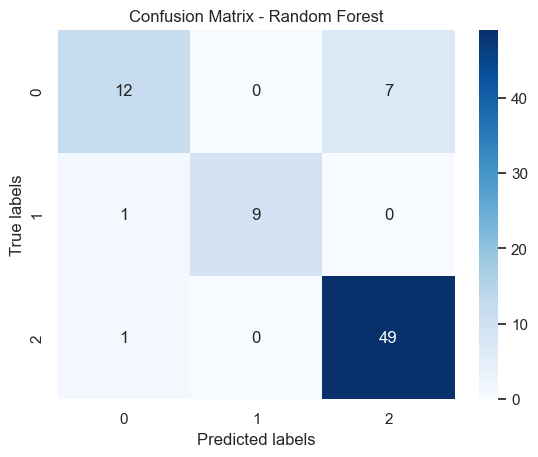

Preprocessing: Impute Mean, Model: Random Forest
Classification Report:
              precision  recall  f1-score  support
economical         0.81    0.81      0.81    21.00
luxury             0.86    0.80      0.83    15.00
standard           0.90    0.91      0.90    66.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.85    0.84      0.85   102.00
weighted avg       0.87    0.87      0.87   102.00
Accuracy: 0.8725490196078431
Confusion Matrix:


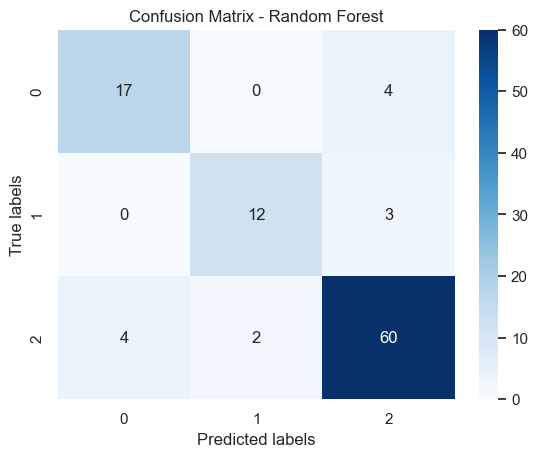

Preprocessing: Impute Median, Model: Random Forest
Classification Report:
              precision  recall  f1-score  support
economical         0.77    0.81      0.79    21.00
luxury             0.86    0.80      0.83    15.00
standard           0.89    0.89      0.89    66.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.84    0.83      0.84   102.00
weighted avg       0.86    0.86      0.86   102.00
Accuracy: 0.8627450980392157
Confusion Matrix:


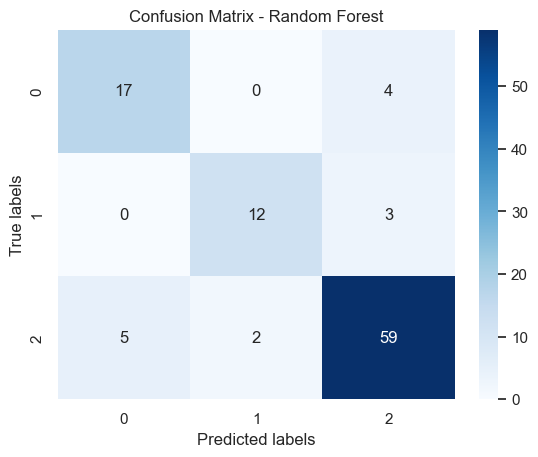

Preprocessing: Predictive Imputation, Model: Random Forest
Classification Report:
              precision  recall  f1-score  support
economical         0.83    0.65      0.73    23.00
luxury             1.00    0.94      0.97    18.00
standard           0.86    0.95      0.90    58.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.90    0.85      0.87    99.00
weighted avg       0.88    0.88      0.87    99.00
Accuracy: 0.8787878787878788
Confusion Matrix:


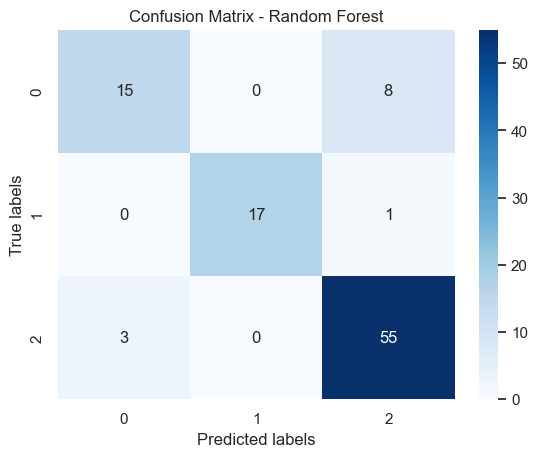

In [88]:
def evaluate_preprocessing_methods_rf(data_file, target_column):
    df = pd.read_excel(data_file)

    preprocessors = [
        ('Remove Missing', lambda x: x.remove_missing_values()),
        ('Impute Mean', lambda x: x.impute_mean_median_mode('mean')),
        ('Impute Median', lambda x: x.impute_mean_median_mode('median')),
        ('Predictive Imputation', lambda x: x.predictive_imputation())
    ]

    results = []

    for method_name, preprocessor_function in preprocessors:
        preprocessor = DataPreprocessor(df.copy())
        processed_data = preprocessor_function(preprocessor)

        model = RandomForest(processed_data.copy(), target_column)
        model.prepare_data()

        rf_params = {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        rf_clf = model.train_random_forest(rf_params, False)

        y_pred = rf_clf.predict(model.X_test)
        cm = confusion_matrix(model.y_test, y_pred)
        report = classification_report(model.y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(model.y_test, y_pred)

        results.append({
            'Preprocessing': method_name,
            'Model': 'Random Forest',
            'Confusion Matrix': cm,
            'Report': report,
            'Accuracy': accuracy
        })

    for result in results:
        print(f"Preprocessing: {result['Preprocessing']}, Model: {result['Model']}")
        print("Classification Report:")
        print(pd.DataFrame(result['Report']).transpose().round(2))
        print("Accuracy:", result['Accuracy'])
        print("Confusion Matrix:")
        fig, ax = plt.subplots()
        sns.heatmap(result['Confusion Matrix'], annot=True, ax=ax, cmap='Blues', fmt='g')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {result["Model"]}')
        plt.show()

evaluate_preprocessing_methods_rf('DataSet.xlsx', 'MEDV')

Preprocessing: Remove Missing, Model: XGBoost
Classification Report:
              precision  recall  f1-score  support
0                  0.85    0.58      0.69    19.00
1                  1.00    0.70      0.82    10.00
2                  0.81    0.96      0.88    50.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.89    0.75      0.80    79.00
weighted avg       0.84    0.84      0.83    79.00
Accuracy: 0.8354430379746836
Confusion Matrix:


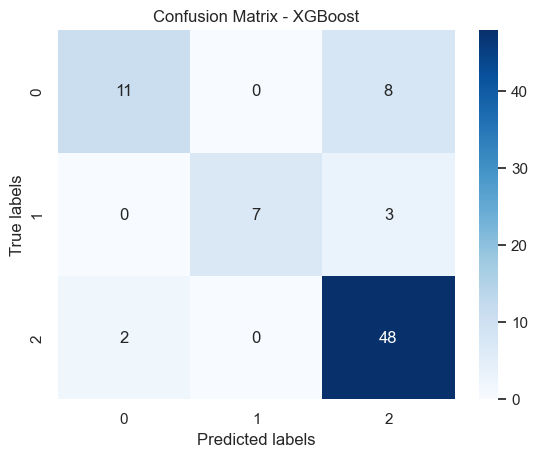

Preprocessing: Impute Mean, Model: XGBoost
Classification Report:
              precision  recall  f1-score  support
0                  0.78    0.86      0.82    21.00
1                  0.86    0.80      0.83    15.00
2                  0.91    0.89      0.90    66.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.85    0.85      0.85   102.00
weighted avg       0.87    0.87      0.87   102.00
Accuracy: 0.8725490196078431
Confusion Matrix:


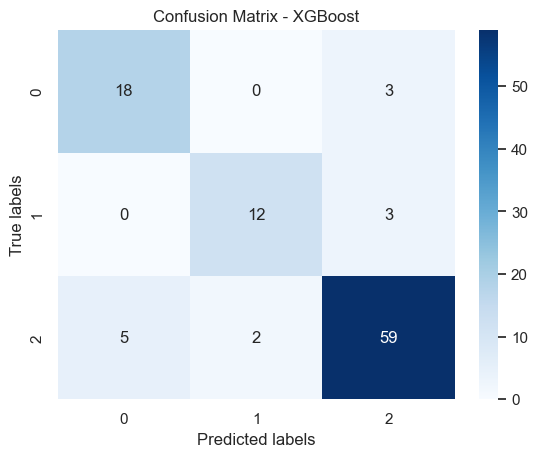

Preprocessing: Impute Median, Model: XGBoost
Classification Report:
              precision  recall  f1-score  support
0                  0.75    0.86      0.80    21.00
1                  0.86    0.80      0.83    15.00
2                  0.91    0.88      0.89    66.00
accuracy           0.86    0.86      0.86     0.86
macro avg          0.84    0.85      0.84   102.00
weighted avg       0.87    0.86      0.86   102.00
Accuracy: 0.8627450980392157
Confusion Matrix:


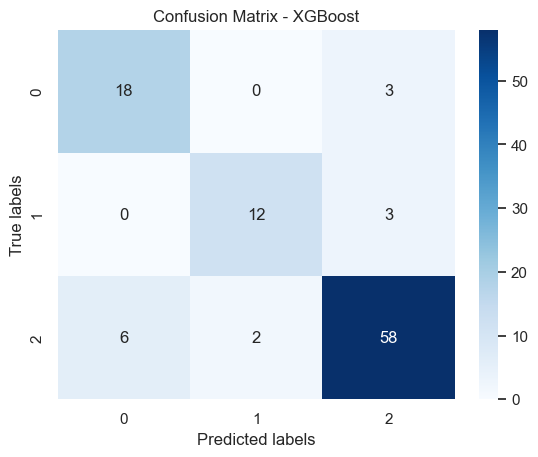

Preprocessing: Predictive Imputation, Model: XGBoost
Classification Report:
              precision  recall  f1-score  support
0                  0.71    0.65      0.68    23.00
1                  1.00    0.89      0.94    18.00
2                  0.84    0.90      0.87    58.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.85    0.81      0.83    99.00
weighted avg       0.84    0.84      0.84    99.00
Accuracy: 0.8383838383838383
Confusion Matrix:


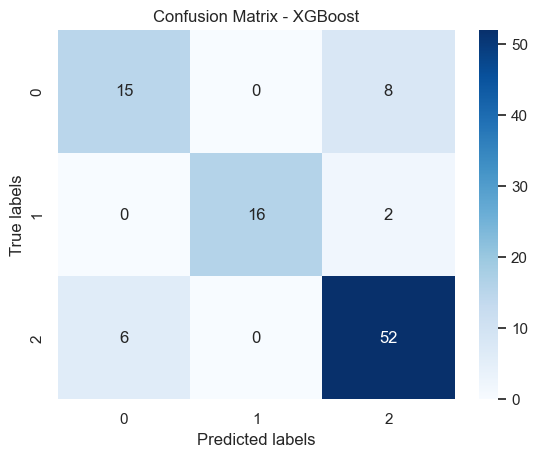

In [89]:
def evaluate_preprocessing_methods(data_file, target_column):
    df = pd.read_excel(data_file)

    preprocessors = [
        ('Remove Missing', lambda x: x.remove_missing_values()),
        ('Impute Mean', lambda x: x.impute_mean_median_mode('mean')),
        ('Impute Median', lambda x: x.impute_mean_median_mode('median')),
        ('Predictive Imputation', lambda x: x.predictive_imputation())
    ]

    results = []

    for method_name, preprocessor_function in preprocessors:
        preprocessor = DataPreprocessor(df.copy())
        processed_data = preprocessor_function(preprocessor)

        model = XGBoost(processed_data.copy(), target_column)
        model.prepare_data()

        xgb_params = {
            'max_depth': range(3, 10),
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.2]
        }

        xgb_clf = model.train_xgboost(xgb_params, False)

        y_pred = xgb_clf.predict(model.X_test)
        cm = confusion_matrix(model.y_test, y_pred)
        report = classification_report(model.y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(model.y_test, y_pred)

        results.append({
            'Preprocessing': method_name,
            'Model': 'XGBoost',
            'Confusion Matrix': cm,
            'Report': report,
            'Accuracy': accuracy
        })

    for result in results:
        print(f"Preprocessing: {result['Preprocessing']}, Model: {result['Model']}")
        print("Classification Report:")
        print(pd.DataFrame(result['Report']).transpose().round(2))
        print("Accuracy:", result['Accuracy'])
        print("Confusion Matrix:")
        fig, ax = plt.subplots()
        sns.heatmap(result['Confusion Matrix'], annot=True, ax=ax, cmap='Blues', fmt='g')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {result["Model"]}')
        plt.show()

evaluate_preprocessing_methods('DataSet.xlsx', 'MEDV')

Preprocessing: Remove Missing, Model: SVM
Classification Report:
              precision  recall  f1-score  support
economical         0.38    0.26      0.31    19.00
luxury             1.00    0.10      0.18    10.00
standard           0.68    0.88      0.77    50.00
accuracy           0.63    0.63      0.63     0.63
macro avg          0.69    0.41      0.42    79.00
weighted avg       0.65    0.63      0.58    79.00
Accuracy: 0.6329113924050633
Confusion Matrix:


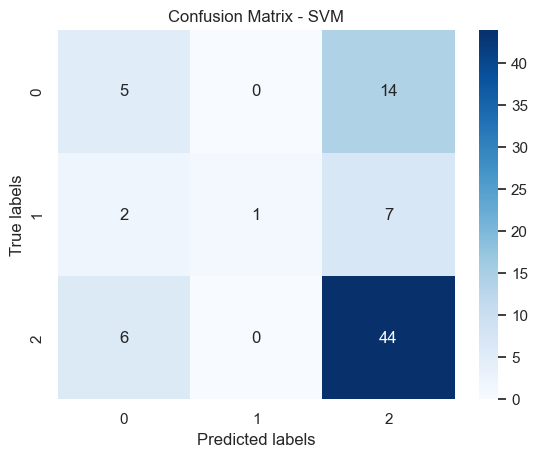

Preprocessing: Impute Mean, Model: SVM
Classification Report:
              precision  recall  f1-score  support
economical         0.62    0.62      0.62    21.00
luxury             1.00    0.20      0.33    15.00
standard           0.76    0.89      0.82    66.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.79    0.57      0.59   102.00
weighted avg       0.76    0.74      0.71   102.00
Accuracy: 0.7352941176470589
Confusion Matrix:


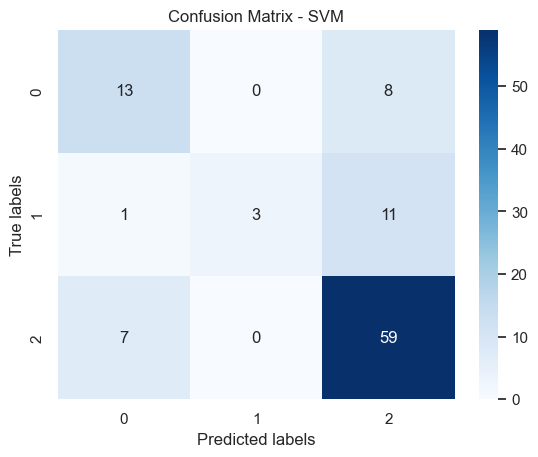

Preprocessing: Impute Median, Model: SVM
Classification Report:
              precision  recall  f1-score  support
economical         0.60    0.57      0.59    21.00
luxury             1.00    0.20      0.33    15.00
standard           0.75    0.89      0.81    66.00
accuracy           0.73    0.73      0.73     0.73
macro avg          0.78    0.56      0.58   102.00
weighted avg       0.75    0.73      0.70   102.00
Accuracy: 0.7254901960784313
Confusion Matrix:


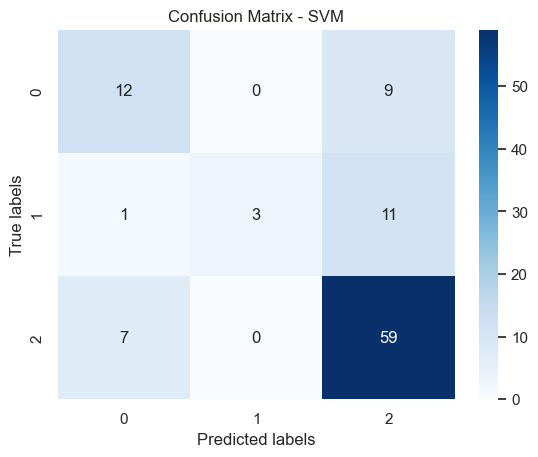

Preprocessing: Predictive Imputation, Model: SVM
Classification Report:
              precision  recall  f1-score  support
economical         0.75    0.26      0.39    23.00
luxury             1.00    0.50      0.67    18.00
standard           0.68    0.97      0.80    58.00
accuracy           0.72    0.72      0.72     0.72
macro avg          0.81    0.58      0.62    99.00
weighted avg       0.76    0.72      0.68    99.00
Accuracy: 0.7171717171717171
Confusion Matrix:


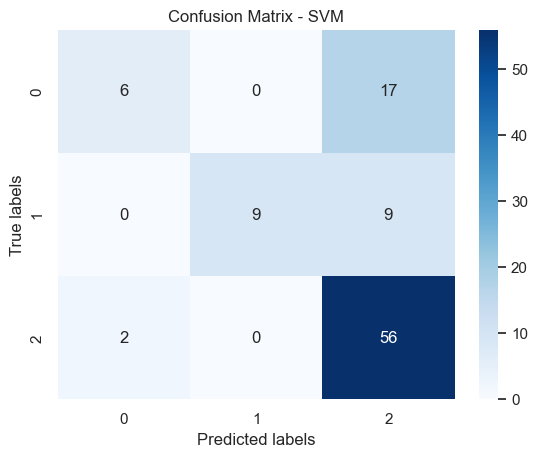

In [90]:
def evaluate_preprocessing_methods(data_file, target_column):
    df = pd.read_excel(data_file)

    preprocessors = [
        ('Remove Missing', lambda x: x.remove_missing_values()),
        ('Impute Mean', lambda x: x.impute_mean_median_mode('mean')),
        ('Impute Median', lambda x: x.impute_mean_median_mode('median')),
        ('Predictive Imputation', lambda x: x.predictive_imputation())
    ]

    results = []

    for method_name, preprocessor_function in preprocessors:
        preprocessor = DataPreprocessor(df.copy())
        processed_data = preprocessor_function(preprocessor)

        model = SupportVectorMachine(processed_data.copy(), target_column)
        model.prepare_data()

        svm_params = {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }

        svm_clf = model.train_svm(svm_params, search_method='grid', kernel='rbf', show = False)

        y_pred = svm_clf.predict(model.X_test)
        cm = confusion_matrix(model.y_test, y_pred)
        report = classification_report(model.y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(model.y_test, y_pred)

        results.append({
            'Preprocessing': method_name,
            'Model': 'SVM',
            'Confusion Matrix': cm,
            'Report': report,
            'Accuracy': accuracy
        })

    for result in results:
        print(f"Preprocessing: {result['Preprocessing']}, Model: {result['Model']}")
        print("Classification Report:")
        print(pd.DataFrame(result['Report']).transpose().round(2))
        print("Accuracy:", result['Accuracy'])
        print("Confusion Matrix:")
        fig, ax = plt.subplots()
        sns.heatmap(result['Confusion Matrix'], annot=True, ax=ax, cmap='Blues', fmt='g')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'Confusion Matrix - {result["Model"]}')
        plt.show()

evaluate_preprocessing_methods('DataSet.xlsx', 'MEDV')

#### <p align="justify"><font size="5" color="#d62b5b">Conclusion: Implementing Machine Learning Models for Predictive Analysis</font></p>

<p align="justify">
This project involved a systematic approach to applying machine learning (ML) techniques on a dataset from data gathering to model evaluation, specifically focusing on classification tasks. Here's a breakdown of our journey:

<b> Data Gathering </b>
The first step involved gathering the required data. We assumed the data was available in an Excel file, `DataSet.xlsx`, from which we could read directly into a Pandas DataFrame. This step is crucial as it sets the foundation for all subsequent analysis and modeling.

<b>Data Preprocessing</b>
Next, we focused on preprocessing the data, which included:
- Handling missing values through imputation.
- Encoding categorical variables to make the data suitable for machine learning algorithms.
- Splitting the data into training and testing sets to ensure the model could be trained and then independently evaluated.

<b>Exploratory Data Analysis (EDA)</b>
We performed EDA to understand the underlying patterns, relationships, and anomalies in the data. This included visualizing distributions, checking correlations, and identifying any peculiar trends or outliers in the dataset.

<b>Machine Learning Models</b>
We implemented two major machine learning models using Scikit-learn:
1. **K-Nearest Neighbors (KNN)**
   - We used both Grid Search and Random Search for hyperparameter tuning.
   - We trained and tested the model, evaluated its performance, and visualized the results.
   
2. **Support Vector Machine (SVM)**
   - We classified the data using SVM with RBF and Linear kernels.
   - We applied both Grid Search and Random Search to find the best classifier settings for the two kernels.
   - We carefully chose between Grid Search and Random Search based on their characteristics and the computational cost. Grid Search being exhaustive was considered when precision in hyperparameter tuning was critical, while Random Search was utilized for its efficiency in larger parameter spaces.

<b>Results and Evaluation</b>
For each model, we:
- Presented the best hyperparameters found through the tuning process.
- Evaluated the models using classification reports which provided insights into their accuracy, precision, recall, and F1-scores.
- Discussed the trade-offs between model complexity and performance, ensuring not to overfit the training data.

<b>Conclusion</b>
Through this project, we demonstrated a structured approach to handling a predictive analysis task from start to finish. The application of KNN and SVM allowed us to explore different aspects of ML modeling, including the necessity of appropriate hyperparameter tuning and model evaluation strategies. The iterative process of refining the models based on the results of hyperparameter tuning highlighted the importance of a methodical approach to ML implementation.

The flexibility in choosing between Grid Search and Random Search allowed us to balance between computational efficiency and thoroughness, ensuring the best possible model performance within practical constraints.

Overall, this project exemplifies how systematic data analysis, combined with strategic use of machine learning techniques, can lead to effective and insightful outcomes.
</p>
